In [ ]:
# Data Cleaning, EDA, Data Visualization, and Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
sns.set(rc={'figure.figsize':(20,10)})
police_hr = "C:\\Users\\victo\\OneDrive\\Documents\\Python Scripts\\police_hr.xlsx"
df=pd.read_excel(police_hr)
df.head()

,Employee Name,Dept Short Desc,State Jobcode Descr,FUNC Jobcode Descr,Annual,Sex,Age,Race,Hire Dt,ID Number
0,"Abay,Michael Gerald",THP,Trooper,Highway Patrol Trooper,64918.92,M,31,WHITE,2013-07-14,14134
1,"Abreu,Joe Luis",THP,Trooper,Highway Patrol Trooper,64918.92,M,27,HISPA,2015-06-21,14534
2,"Abshire,Brian P",THP,Trooper,Highway Patrol Trooper,69540.96,M,33,WHITE,2008-08-18,13325
3,"Abundiz,Joshua Anthony",THP,Probationary Trooper,Probationary Trooper,44082.00,M,22,HISPA,2018-01-07,15516
4,"Aburto Jr,Jaime",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,72711.00,M,54,HISPA,2011-08-17,13757


In [2]:
df.shape

(3167, 10)

In [3]:
###Exploratory data analysis and data cleaning

In [4]:
df.isna().sum()

Employee Name          0
Dept Short Desc        0
State Jobcode Descr    0
FUNC Jobcode Descr     0
Annual                 0
Sex                    0
Age                    0
Race                   0
Hire Dt                0
ID Number              0
dtype: int64

In [5]:
df.dtypes

Employee Name                  object
Dept Short Desc                object
State Jobcode Descr            object
FUNC Jobcode Descr             object
Annual                        float64
Sex                            object
Age                             int64
Race                           object
Hire Dt                datetime64[ns]
ID Number                       int64
dtype: object

In [6]:
df.describe()

,Annual,Age,ID Number
count,3167.000000,3167.000000,3167.000000
mean,67051.435908,37.316072,12859.723398
std,12985.790152,9.915126,2537.300323
min,44082.000000,21.000000,1345.000000
25%,53241.960000,29.000000,11360.500000
50%,64918.920000,35.000000,13812.000000
75%,75967.920000,45.000000,14826.500000
max,198164.040000,74.000000,15689.000000


In [7]:
df = df.rename(columns={'Annual':'Annual_salary','Employee Name':'Employee_name','Dept Short Desc':'Short_desc','State Jobcode Descr':'Job_title','FUNC Jobcode Descr':'Job_function','Hire Dt':'Hire_date','ID Number':'Id_no'})

In [8]:
df

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no
0,"Abay,Michael Gerald",THP,Trooper,Highway Patrol Trooper,64918.92,M,31,WHITE,2013-07-14,14134
1,"Abreu,Joe Luis",THP,Trooper,Highway Patrol Trooper,64918.92,M,27,HISPA,2015-06-21,14534
2,"Abshire,Brian P",THP,Trooper,Highway Patrol Trooper,69540.96,M,33,WHITE,2008-08-18,13325
3,"Abundiz,Joshua Anthony",THP,Probationary Trooper,Probationary Trooper,44082.00,M,22,HISPA,2018-01-07,15516
4,"Aburto Jr,Jaime",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,72711.00,M,54,HISPA,2011-08-17,13757
...,...,...,...,...,...,...,...,...,...,...
3162,"Zobel,Matthew Brandon",THP,Trooper,Highway Patrol Trooper,69540.96,M,34,WHITE,2009-09-27,13420
3163,"Zuniga,Juan Hector",THP,Trooper,Highway Patrol Trooper,64918.92,M,37,HISPA,2013-01-21,14132
3164,"Zuniga,Leandro",THP,Corporal,Highway Patrol Corporal,64918.92,M,33,HISPA,2013-01-21,14124
3165,"Zuniga,Maria Guadalupe",THP,Trooper,Highway Patrol Trooper,53241.96,F,23,HISPA,2017-03-12,15417


In [9]:
#I want to check values in each variable

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for variable {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for variable {} :{}'.format(column, nr_values))

The number of values for variable Employee_name :3166
The number of values for variable Short_desc :1 -- ['THP']
The number of values for variable Job_title :10
The number of values for variable Job_function :22
The number of values for variable Annual_salary :24
The number of values for variable Sex :2 -- ['F' 'M']
The number of values for variable Age :52
The number of values for variable Race :5 -- ['AMIND' 'ASIAN' 'BLACK' 'HISPA' 'WHITE']
The number of values for variable Hire_date :308
The number of values for variable Id_no :3165


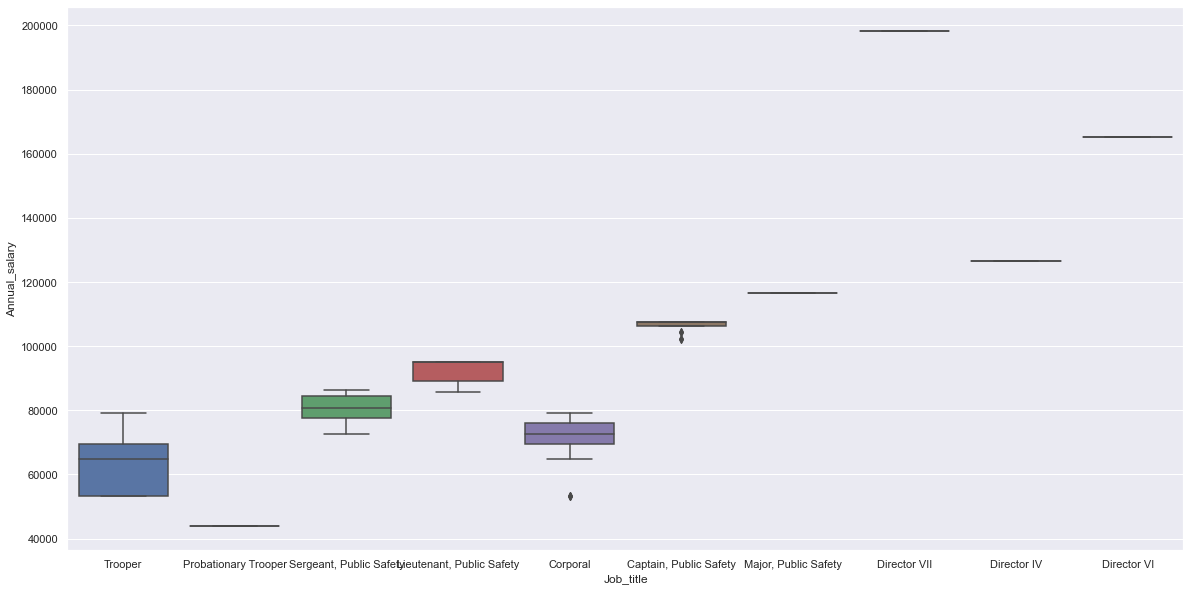

In [10]:
#Investigate unique values
ax = sns.boxplot(x = 'Job_title', y = 'Annual_salary', data = df)

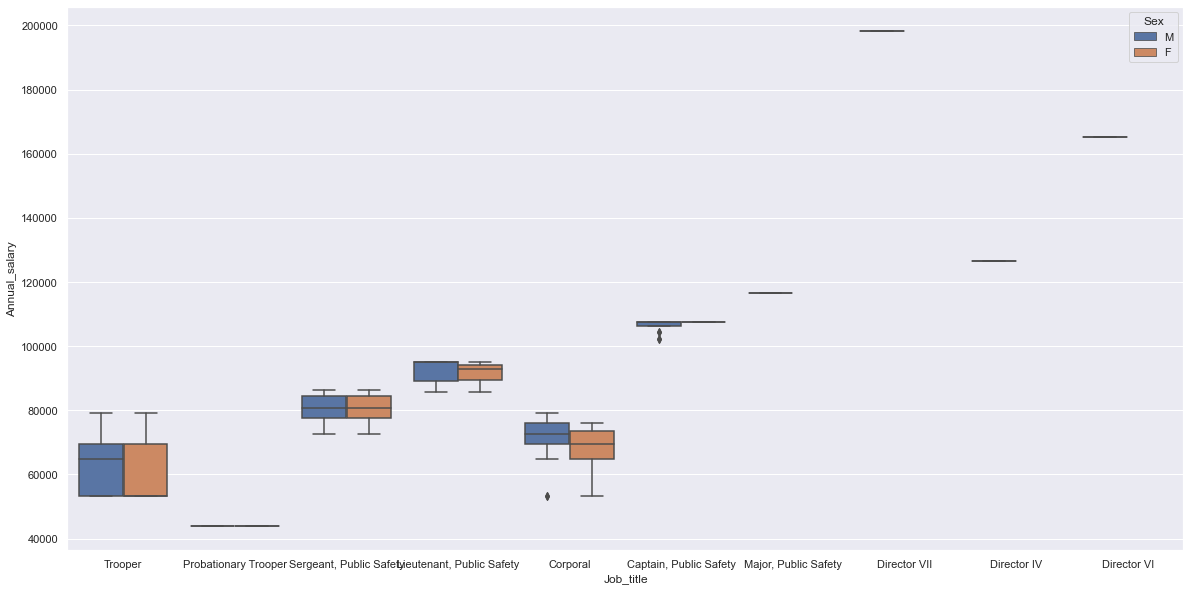

In [11]:
#Investigate unique values
ax = sns.boxplot(x = 'Job_title', y = 'Annual_salary', data = df, hue = 'Sex')

In [12]:
df['Date'] = '01-Jan-2021'
df['Date']= pd.to_datetime(df['Date'])
df['Hire_date']= pd.to_datetime(df['Hire_date'])
df['Experience'] = df['Date'] - df['Hire_date']
df['Experience'] = df['Experience']
#changing experience in days to years
df['Experience_years'] = pd.to_timedelta(df.Experience, unit='D') / np.timedelta64(1,'Y')

In [13]:
df.columns

Index(['Employee_name', 'Short_desc', 'Job_title', 'Job_function',
       'Annual_salary', 'Sex', 'Age', 'Race', 'Hire_date', 'Id_no', 'Date',
       'Experience', 'Experience_years'],
      dtype='object')

In [14]:
df['Date']

0      2021-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
3162   2021-01-01
3163   2021-01-01
3164   2021-01-01
3165   2021-01-01
3166   2021-01-01
Name: Date, Length: 3167, dtype: datetime64[ns]

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The meadian is:  64918.92


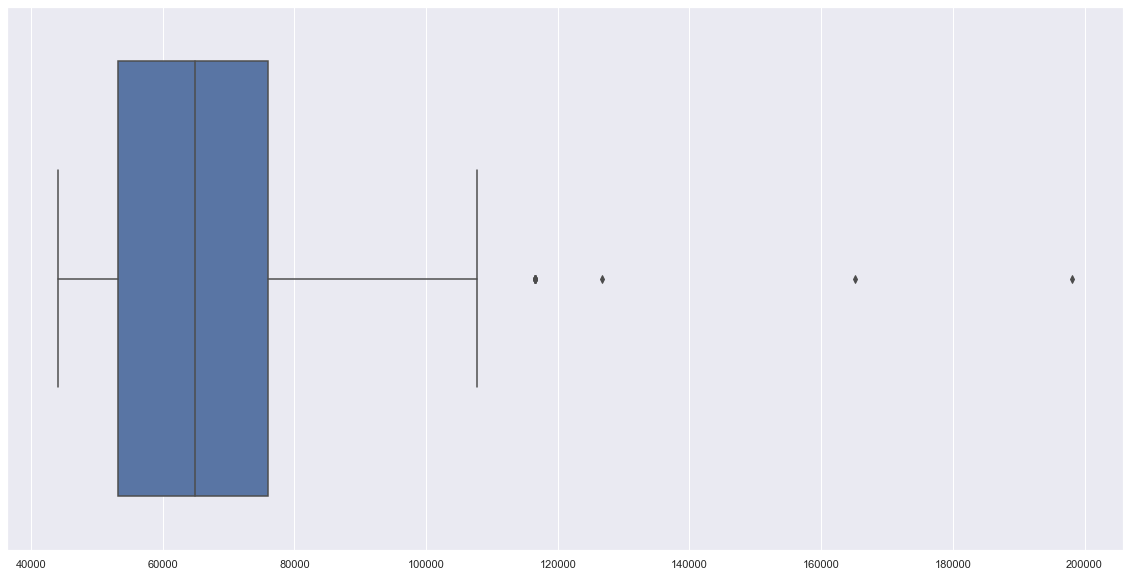

In [15]:
#checking for outliers
x = df['Annual_salary'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['Annual_salary'].median())

In [16]:
#the directors' salaries are the outliers, but if I deleted them- the data will have no directors
df[df['Annual_salary']>120000]

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
1428,"Joy Jr,Ronald Clayton",THP,Director VII,"Chief, THP",198164.04,M,50,WHITE,1989-09-12,6880,2021-01-01,11434 days,31.305229
2080,"Palmer,David L",THP,Director IV,Major THP Chief's Staff,126714.60,M,54,WHITE,1995-02-21,8342,2021-01-01,9446 days,25.862270
2606,"Sibley III,Henry Arthur",THP,Director VI,"Assistant Chief, THP",165136.68,M,59,WHITE,1985-01-09,6066,2021-01-01,13141 days,35.978836


In [17]:
#checking to see that we have just 3 directors
df[['Employee_name','Job_title']].groupby('Job_title').count()

,Employee_name
Job_title,
"Captain, Public Safety",29
Corporal,233
Director IV,1
Director VI,1
Director VII,1
"Lieutenant, Public Safety",83
"Major, Public Safety",12
Probationary Trooper,150
"Sergeant, Public Safety",368


The meadian is:  64918.92


C:\Users\victo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


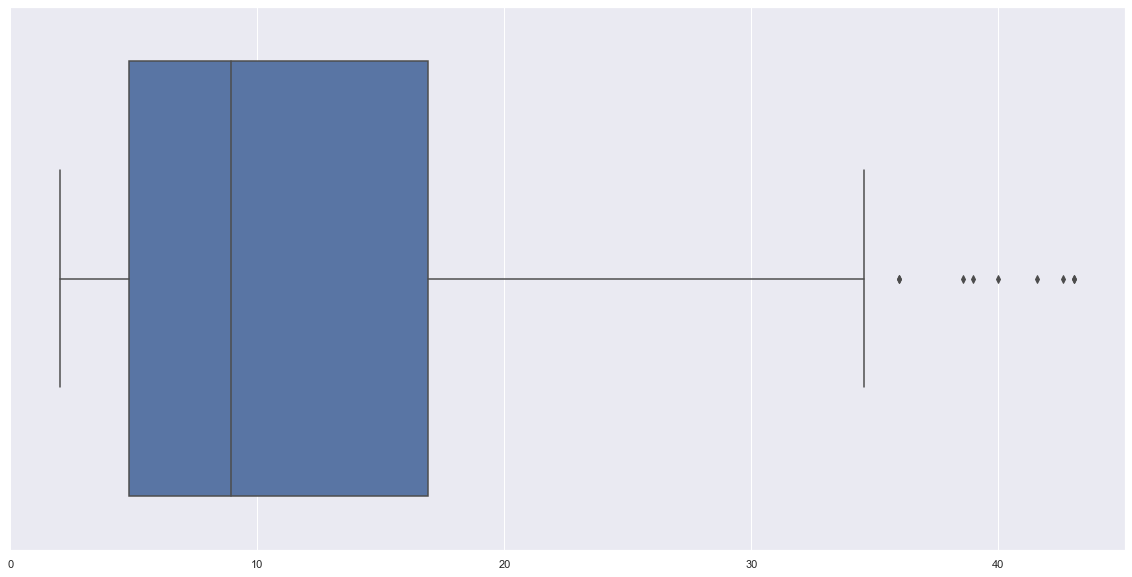

In [18]:
#let's see why we have only 3 directors or what makes a director. Experience?
x = df['Experience_years'].values
x
ax = sns.boxplot(x)

print('The meadian is: ', df['Annual_salary'].median())

In [19]:
df[df['Experience_years']>36]
#so it seems the directors aren't among the most experienced

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
877,"Gails,Victor Jeffery",THP,Trooper,Highway Patrol Trooper,79323.00,M,62,BLACK,1982-01-13,5342,2021-01-01,14233 days,38.968630
963,"Garza,Rene",THP,"Lieutenant, Public Safety",CVE Lieutenant,95191.92,M,64,HISPA,1981-01-01,4879,2021-01-01,14610 days,40.000821
1373,"Jarero Jr,Alfonso Lorenzo",THP,Trooper,Highway Patrol Trooper,79323.00,M,65,HISPA,1977-12-07,4464,2021-01-01,15731 days,43.070015
1503,"Kulak,Ronald Jerome",THP,Trooper,CVE Trooper,79323.00,M,62,WHITE,1978-05-24,4570,2021-01-01,15563 days,42.610047
1592,"Lopez,Arturo",THP,Trooper,CVE Trooper,79323.00,M,60,HISPA,1979-06-13,4780,2021-01-01,15178 days,41.555953
2514,"Sanchez,Jacobo Guadalupe",THP,Corporal,Highway Patrol Corporal,79323.00,M,56,HISPA,1982-06-09,5610,2021-01-01,14086 days,38.566158
2874,"Tucker III,John G",THP,"Lieutenant, Public Safety",Highway Patrol Lieutenant,95191.92,M,63,WHITE,1977-12-07,4504,2021-01-01,15731 days,43.070015


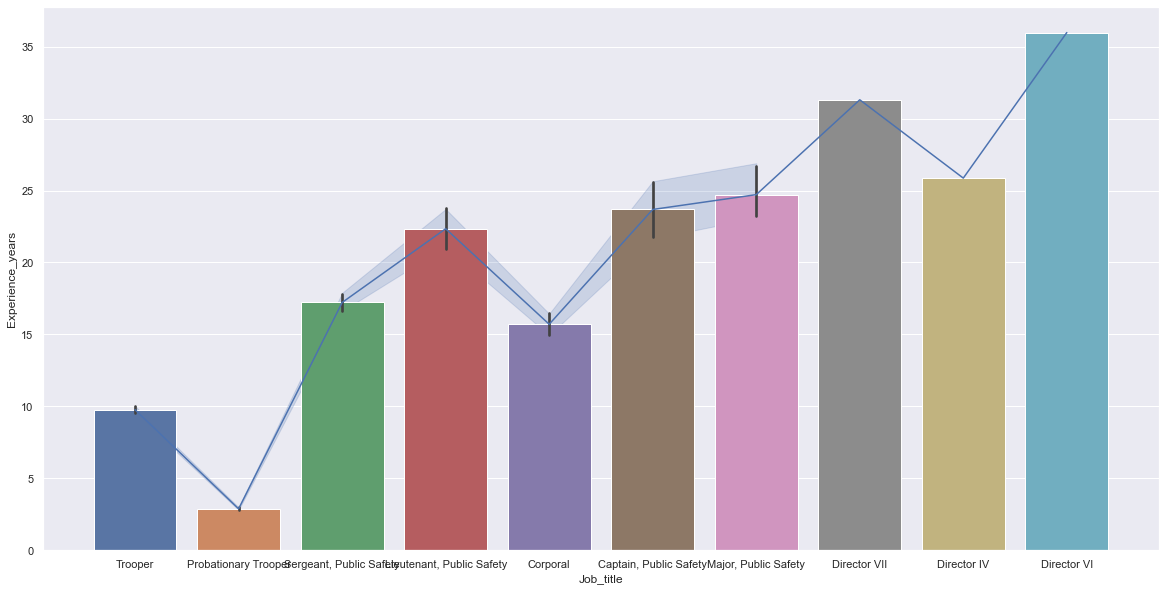

In [20]:
#let's plot experience by job title then
ax = sns.barplot(x="Job_title", y="Experience_years", data=df)
#the barplot shows average, so it shows the 3 directors as the most experienced because there is one of each
ax = sns.lineplot(x="Job_title", y="Experience_years", data=df)

In [21]:
#calculating the maximum experience for each job title
#df[['Job_title', 'Experience_years']].groupby('Job_title', as_index = True).agg({'Experience_years':'max'})
u = pd.DataFrame(df[['Job_title', 'Experience_years']].groupby('Job_title', as_index = True).max())
u

,Experience_years
Job_title,
"Captain, Public Safety",35.978836
Corporal,38.566158
Director IV,25.862270
Director VI,35.978836
Director VII,31.305229
"Lieutenant, Public Safety",43.070015
"Major, Public Safety",34.560600
Probationary Trooper,8.670951
"Sergeant, Public Safety",34.560600


Text(0.5, 1.0, 'Experience by Job title')

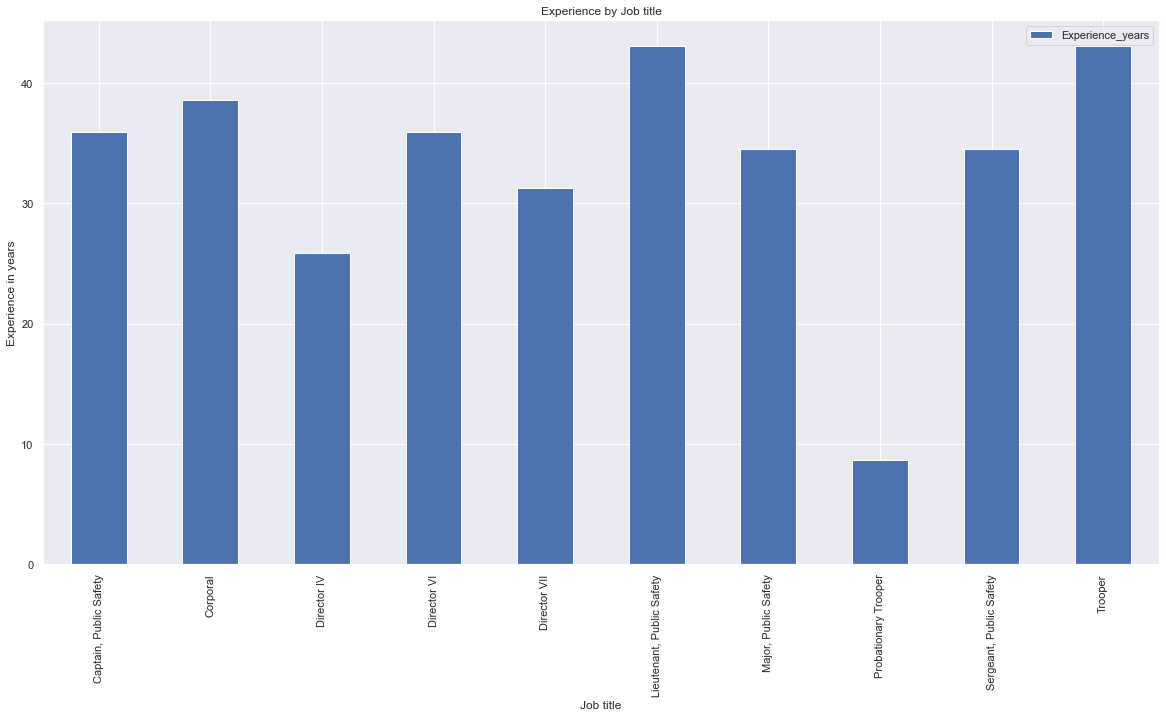

In [22]:
u.plot(kind = 'bar', figsize =(20,10))
plt.ylabel('Experience in years')
plt.xlabel('Job title')
plt.title('Experience by Job title')
#so the directors are clearly not the most experienced

In [23]:
df.head()

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
0,"Abay,Michael Gerald",THP,Trooper,Highway Patrol Trooper,64918.92,M,31,WHITE,2013-07-14,14134,2021-01-01,2728 days,7.469010
1,"Abreu,Joe Luis",THP,Trooper,Highway Patrol Trooper,64918.92,M,27,HISPA,2015-06-21,14534,2021-01-01,2021 days,5.533310
2,"Abshire,Brian P",THP,Trooper,Highway Patrol Trooper,69540.96,M,33,WHITE,2008-08-18,13325,2021-01-01,4519 days,12.372602
3,"Abundiz,Joshua Anthony",THP,Probationary Trooper,Probationary Trooper,44082.00,M,22,HISPA,2018-01-07,15516,2021-01-01,1090 days,2.984319
4,"Aburto Jr,Jaime",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,72711.00,M,54,HISPA,2011-08-17,13757,2021-01-01,3425 days,9.377331


In [24]:
#trying out some filtering
Above_50 = df[df['Age']>50]

In [25]:
Above_50

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
4,"Aburto Jr,Jaime",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,72711.00,M,54,HISPA,2011-08-17,13757,2021-01-01,3425 days,9.377331
5,"Acker,Douglas Martin",THP,Trooper,Highway Patrol Trooper,79323.00,M,59,WHITE,1998-07-20,9354,2021-01-01,8201 days,22.453575
6,"Adams III,John C",THP,"Sergeant, Public Safety",CVE Sergeant,86494.92,M,51,BLACK,1996-02-27,8656,2021-01-01,9075 days,24.846506
11,"Adams,Willie O'Neal",THP,Trooper,Highway Patrol Trooper,79323.00,M,66,BLACK,2002-10-01,4139,2021-01-01,6667 days,18.253626
12,"Adamson,Glenn Dale",THP,"Lieutenant, Public Safety",Highway Patrol Lieutenant,95191.92,M,67,WHITE,2003-10-01,4411,2021-01-01,6302 days,17.254290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,"Winslow,Bobby Ray",THP,Trooper,Highway Patrol Trooper,79323.00,M,64,BLACK,2002-12-01,4386,2021-01-01,6606 days,18.086614
3104,"Witt,Kenneth Bryan",THP,"Lieutenant, Public Safety",Highway Patrol Lieutenant,95191.92,M,51,WHITE,1989-09-12,6933,2021-01-01,11434 days,31.305229
3120,"Wray,Christopher Burke",THP,Trooper,Highway Patrol Trooper,72612.96,M,58,WHITE,2002-10-21,11042,2021-01-01,6647 days,18.198868
3140,"Ynclan,Robert Carlos",THP,Trooper,Highway Patrol Trooper,79323.00,M,60,HISPA,2009-07-20,6080,2021-01-01,4183 days,11.452665


In [26]:
#trying out some filtering
Officer_40_50 = df[(df['Age']>40) & (df['Age']<50)]

In [27]:
Officer_40_50

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
9,"Adams,Michael Wayne",THP,Trooper,Highway Patrol Trooper,75967.92,M,48,WHITE,1998-10-19,9523,2021-01-01,8110 days,22.204426
14,"Adkins,Richard Paul",THP,"Lieutenant, Public Safety",Highway Patrol Lieutenant,95191.92,M,48,WHITE,1997-01-14,8882,2021-01-01,8753 days,23.964900
15,"Aguilar,Jose Fernando",THP,Trooper,CVE Trooper,64918.92,M,41,HISPA,2017-01-08,15161,2021-01-01,1454 days,3.980917
20,"Aguilar,Ramiro",THP,Trooper,CVE Trooper,75967.92,M,44,HISPA,2000-11-07,10072,2021-01-01,7360 days,20.150996
21,"Akers,Robert Donald",THP,Trooper,Highway Patrol Trooper,72612.96,M,44,WHITE,2003-03-01,11170,2021-01-01,6516 days,17.840202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,"Yarbrough,David Lee",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,86494.92,M,48,WHITE,1997-09-22,9190,2021-01-01,8502 days,23.277685
3141,"Yoder,Jason Bartholomew",THP,Trooper,Highway Patrol Trooper,69540.96,M,45,WHITE,2008-03-30,12846,2021-01-01,4660 days,12.758647
3150,"Zamora,Gerardo Javier",THP,Trooper,CVE Trooper,75967.92,M,44,HISPA,2000-09-18,10242,2021-01-01,7410 days,20.287891
3154,"Zaragoza,Jose Alberto",THP,Trooper,Highway Patrol Trooper,69540.96,M,41,HISPA,2009-09-27,13419,2021-01-01,4114 days,11.263749


In [28]:
#trying out some filtering
Officer_30_40 = df[(df['Age']>30) & (df['Age']<40)]
Officer_30_40

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
0,"Abay,Michael Gerald",THP,Trooper,Highway Patrol Trooper,64918.92,M,31,WHITE,2013-07-14,14134,2021-01-01,2728 days,7.469010
2,"Abshire,Brian P",THP,Trooper,Highway Patrol Trooper,69540.96,M,33,WHITE,2008-08-18,13325,2021-01-01,4519 days,12.372602
7,"Adams Jr,Laurance Paul",THP,Trooper,Highway Patrol Trooper,69540.96,M,32,WHITE,2008-05-19,12957,2021-01-01,4610 days,12.621751
13,"Addington,Gregory Slade",THP,Trooper,Highway Patrol Trooper,53241.96,M,31,AMIND,2017-01-08,15160,2021-01-01,1454 days,3.980917
16,"Aguilar,Juan Alberto",THP,Trooper,Highway Patrol Trooper,53241.96,M,34,WHITE,2016-03-13,14813,2021-01-01,1755 days,4.805027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,"Zendt,Ashley Iris",THP,Trooper,Highway Patrol Trooper,69540.96,F,33,WHITE,2007-09-30,12682,2021-01-01,4842 days,13.256946
3161,"Zigmond Jr,Mark Alan",THP,Trooper,CVE Trooper,69540.96,M,33,WHITE,2007-09-30,12683,2021-01-01,4842 days,13.256946
3162,"Zobel,Matthew Brandon",THP,Trooper,Highway Patrol Trooper,69540.96,M,34,WHITE,2009-09-27,13420,2021-01-01,4114 days,11.263749
3163,"Zuniga,Juan Hector",THP,Trooper,Highway Patrol Trooper,64918.92,M,37,HISPA,2013-01-21,14132,2021-01-01,2902 days,7.945406


In [29]:
#trying out some filtering
Officer_below_30 = df[df['Age']<30]
Officer_below_30

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
1,"Abreu,Joe Luis",THP,Trooper,Highway Patrol Trooper,64918.92,M,27,HISPA,2015-06-21,14534,2021-01-01,2021 days,5.533310
3,"Abundiz,Joshua Anthony",THP,Probationary Trooper,Probationary Trooper,44082.00,M,22,HISPA,2018-01-07,15516,2021-01-01,1090 days,2.984319
8,"Adams,Landan Colt",THP,Trooper,Highway Patrol Trooper,53241.96,M,28,WHITE,2015-01-11,14458,2021-01-01,2182 days,5.974113
24,"Alanis,John C",THP,Trooper,Highway Patrol Trooper,53241.96,M,23,HISPA,2016-06-06,14909,2021-01-01,1670 days,4.572305
25,"Alaniz,Julio Cesar",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,72711.00,M,27,HISPA,2013-07-14,14135,2021-01-01,2728 days,7.469010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Yzaguirre,Luis Lauro",THP,Trooper,Highway Patrol Trooper,53241.96,M,28,HISPA,2016-03-13,14908,2021-01-01,1755 days,4.805027
3151,"Zamora-Cabral,Jorge Guillermo",THP,Probationary Trooper,Probationary Trooper,44082.00,M,26,HISPA,2018-06-03,15689,2021-01-01,943 days,2.581846
3157,"Zaro,Danny J",THP,Trooper,Highway Patrol Trooper,53241.96,M,28,WHITE,2017-01-08,15282,2021-01-01,1454 days,3.980917
3160,"Zieschang,Randall Scott",THP,Trooper,Highway Patrol Trooper,53241.96,M,27,WHITE,2015-07-12,14689,2021-01-01,2000 days,5.475814


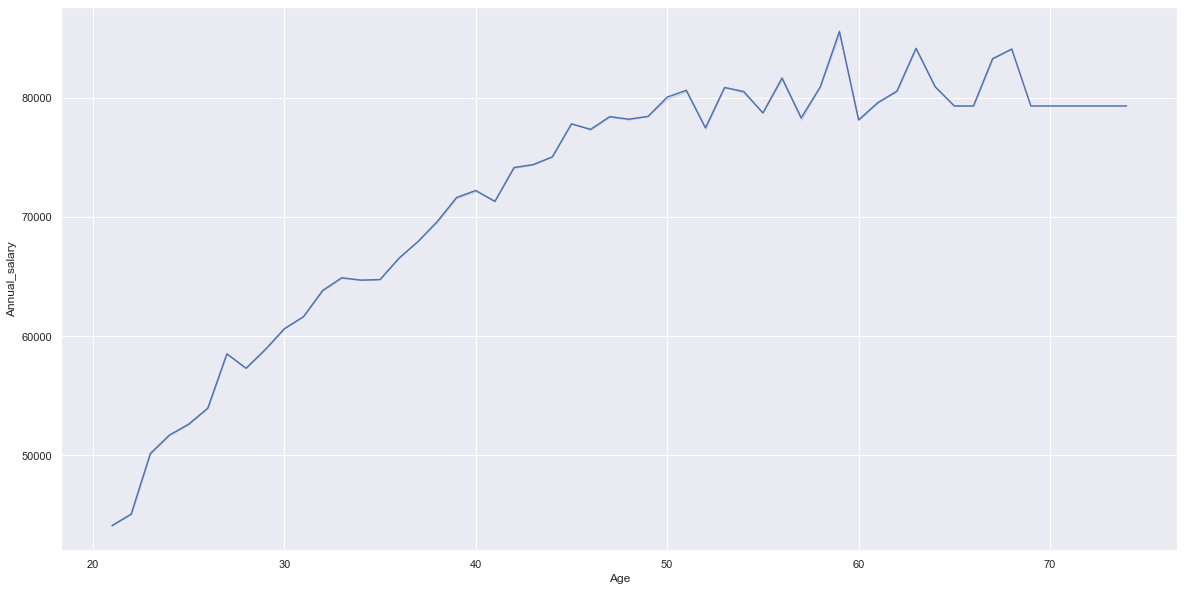

In [30]:
#How annual salary varies with age

ax = sns.lineplot(x='Age', y='Annual_salary', data = df, ci=False)

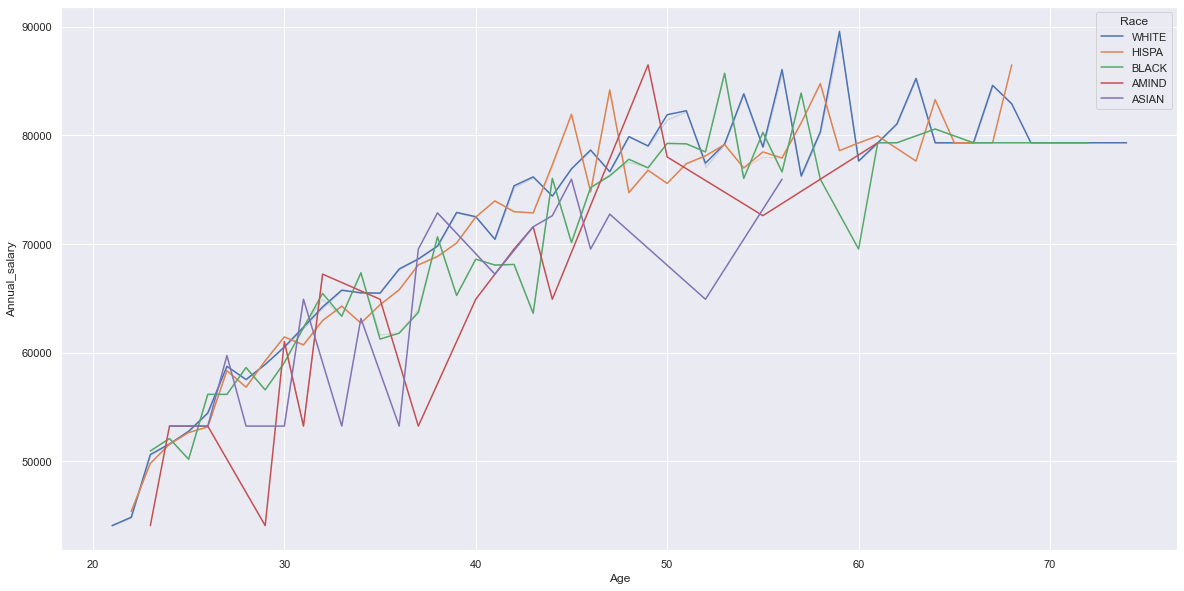

In [31]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', data = df, ci=False)

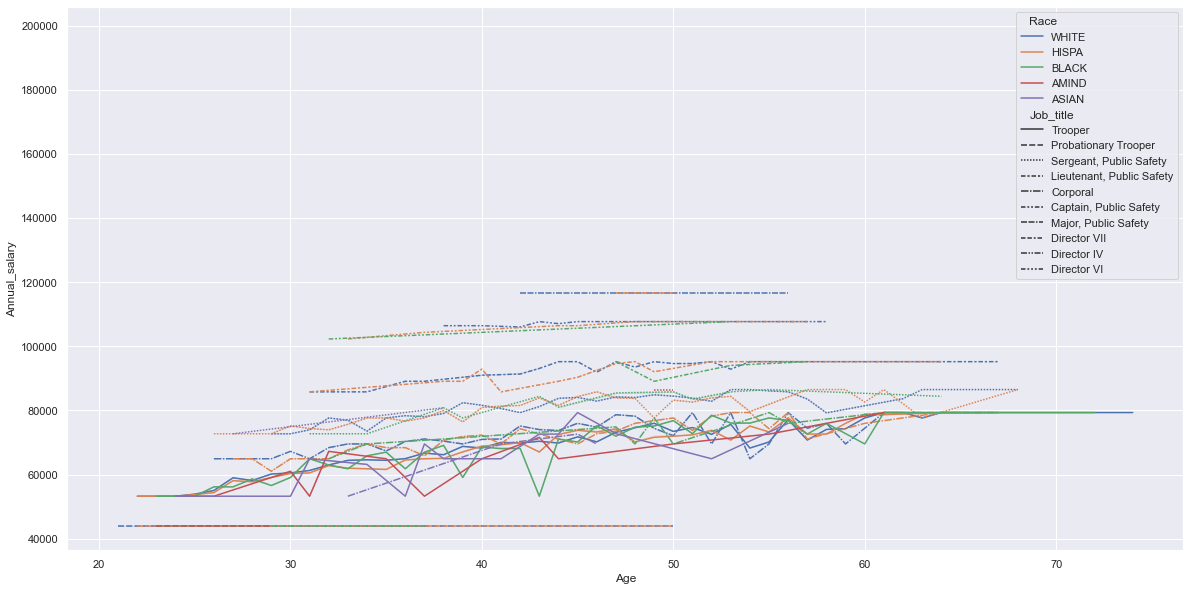

In [32]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', style='Job_title', data = df, ci=False)

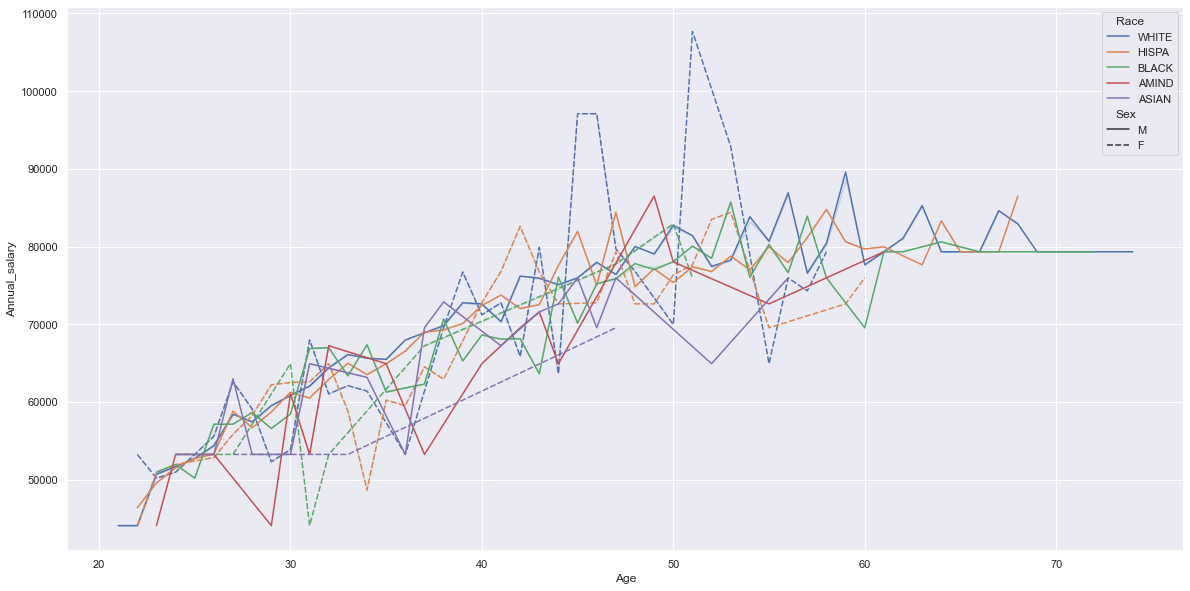

In [33]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', style='Sex', data = df, ci=False)

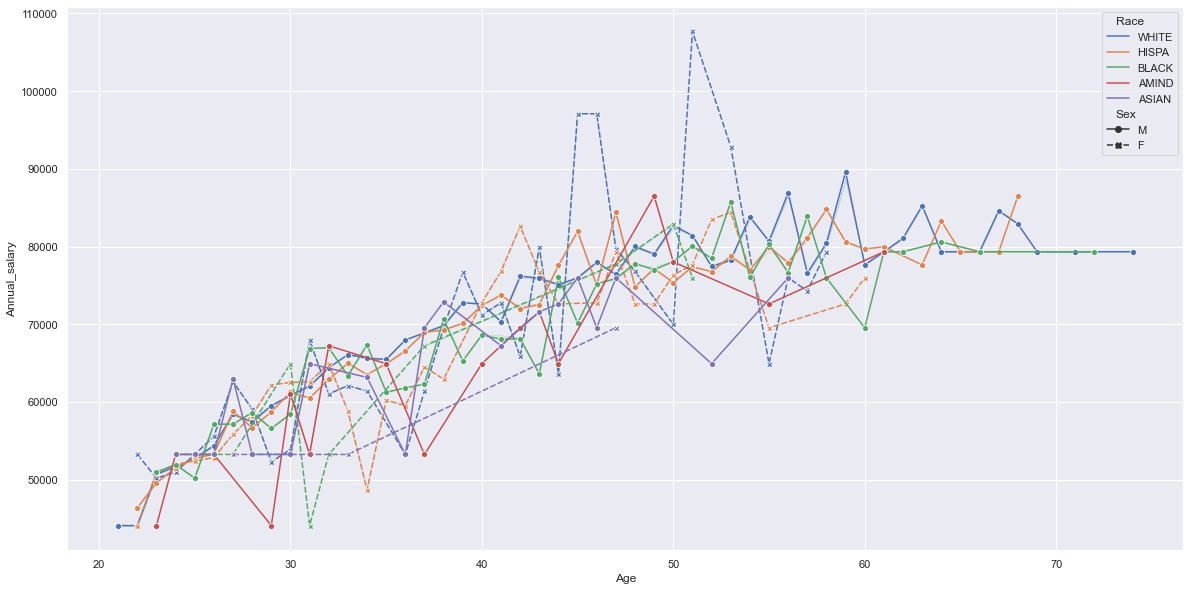

In [34]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', style='Sex', data = df, ci=False, markers = True)

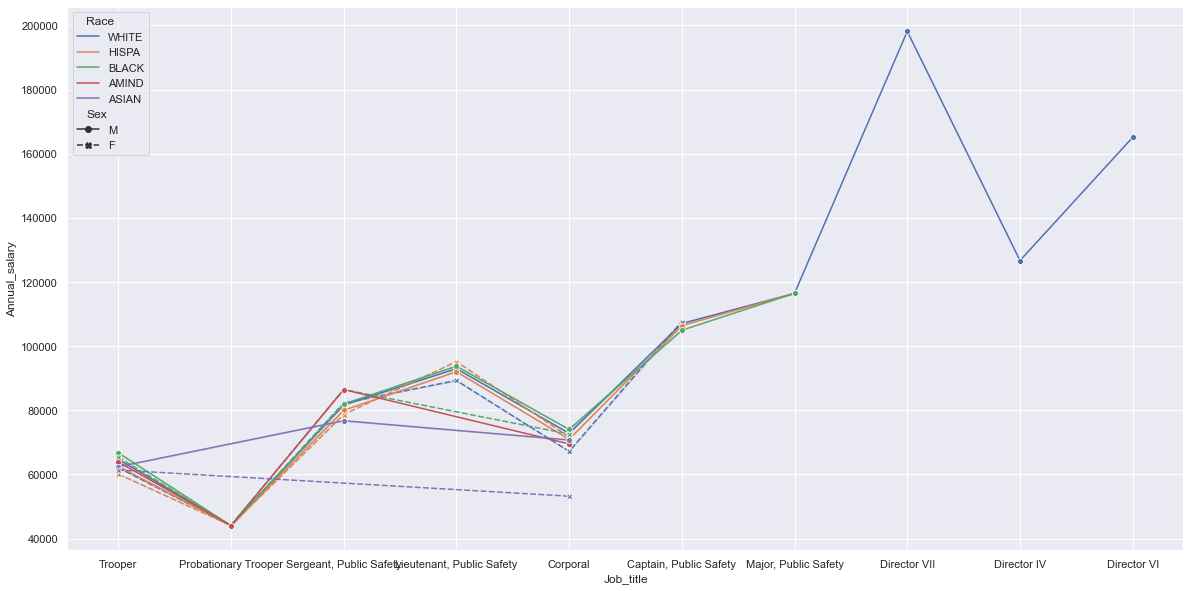

In [35]:

ax = sns.lineplot(x='Job_title', y='Annual_salary', hue= 'Race', style='Sex', data = df, ci=False, markers = True)

In [36]:
df.dtypes

Employee_name                object
Short_desc                   object
Job_title                    object
Job_function                 object
Annual_salary               float64
Sex                          object
Age                           int64
Race                         object
Hire_date            datetime64[ns]
Id_no                         int64
Date                 datetime64[ns]
Experience          timedelta64[ns]
Experience_years            float64
dtype: object

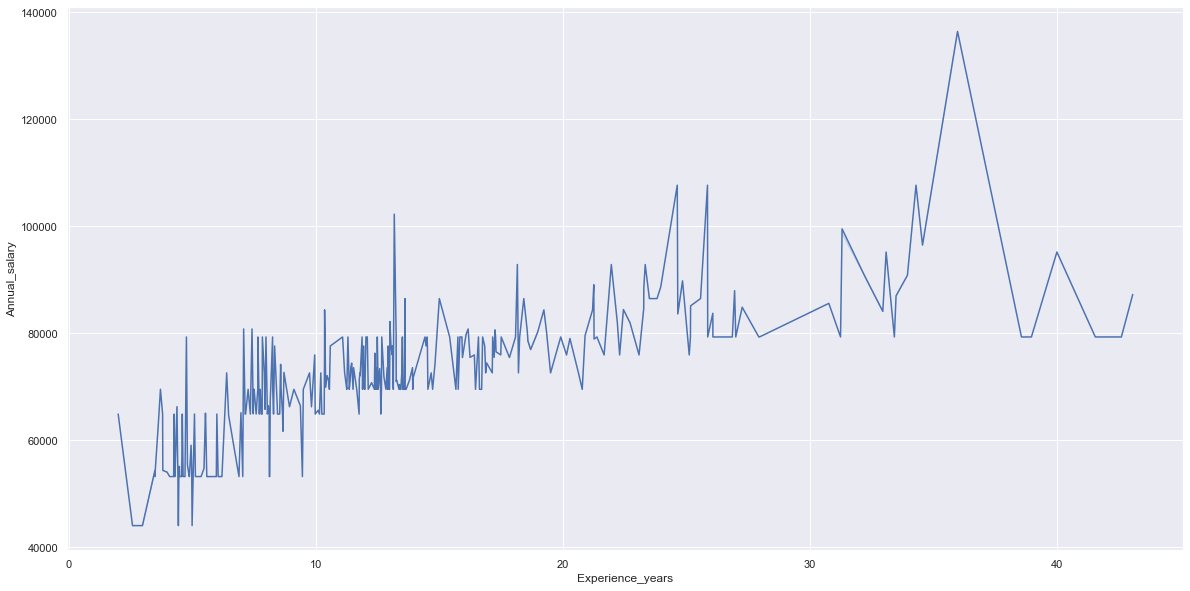

In [37]:
#Experience vs Annual salary
ax = sns.lineplot(x="Experience_years", y="Annual_salary", data=df,ci=False)

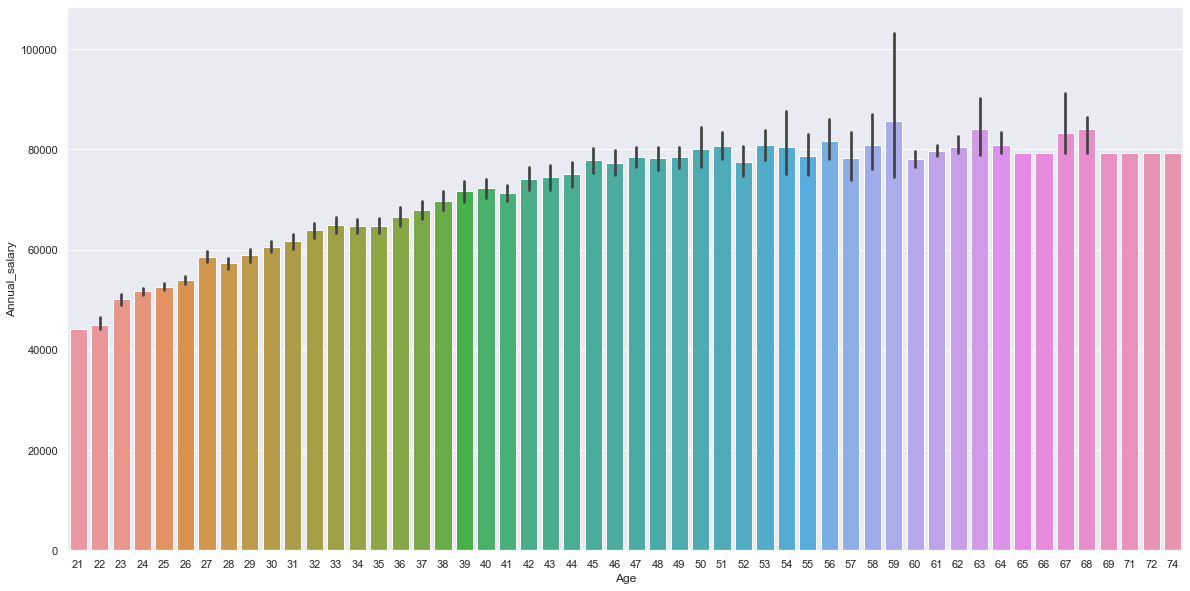

In [38]:
#Age vs Annual salary
ax = sns.barplot(x="Age", y="Annual_salary", data=df)

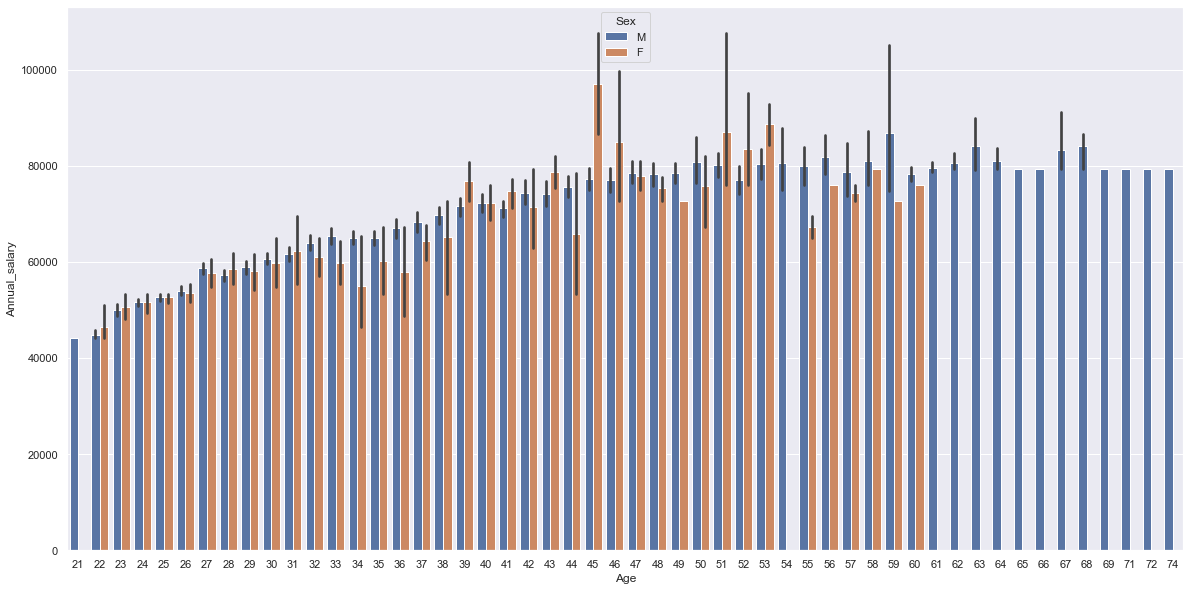

In [39]:
#Age vs Salary vs Sex
ax = sns.barplot(x="Age", y="Annual_salary", hue='Sex', data=df)

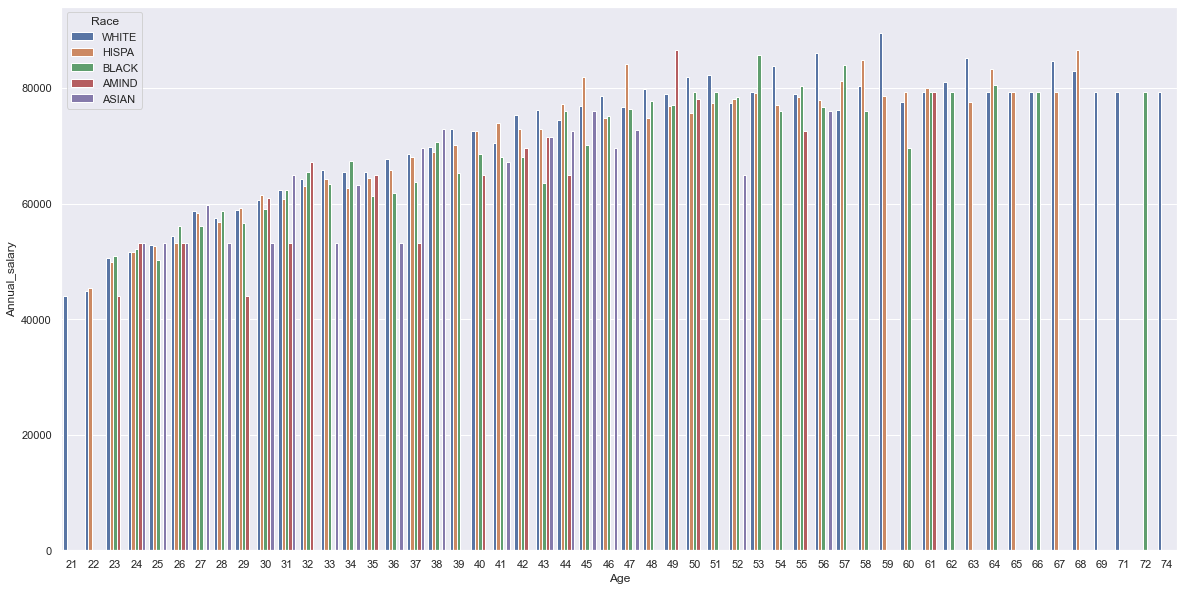

In [40]:
#Age vs Salary vs Race
ax = sns.barplot(x="Age", y="Annual_salary", hue='Race',data=df, ci=False)

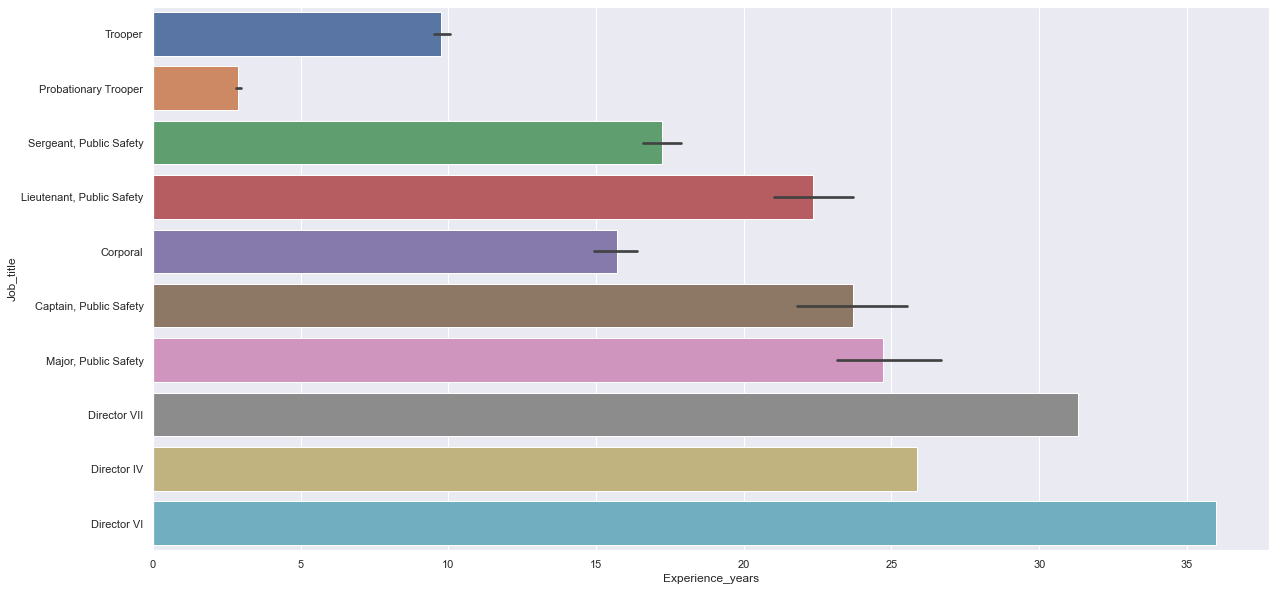

In [41]:
#Job title vs Experience
ax = sns.barplot(x="Experience_years", y="Job_title", data=df)
#this just shows the mean of the years of experience

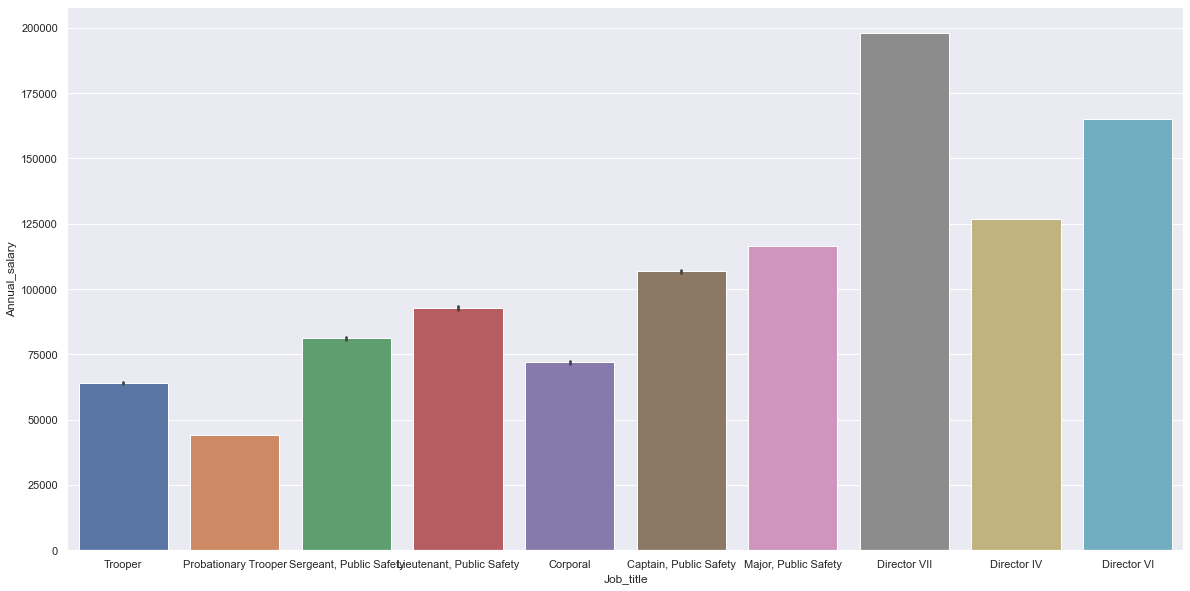

In [42]:
#Job title vs Annual salary
ax = sns.barplot(x="Job_title", y="Annual_salary", data=df)

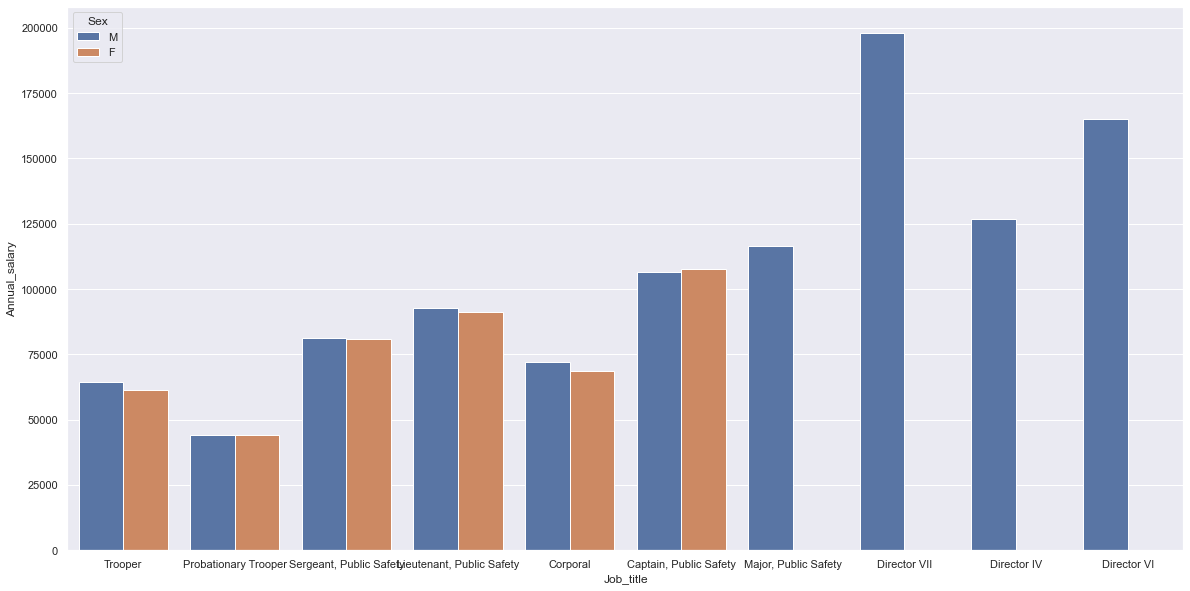

In [43]:
#Job title vs Annual salary vs Sex
ax = sns.barplot(x="Job_title", y="Annual_salary", hue='Sex',data=df, ci=False)

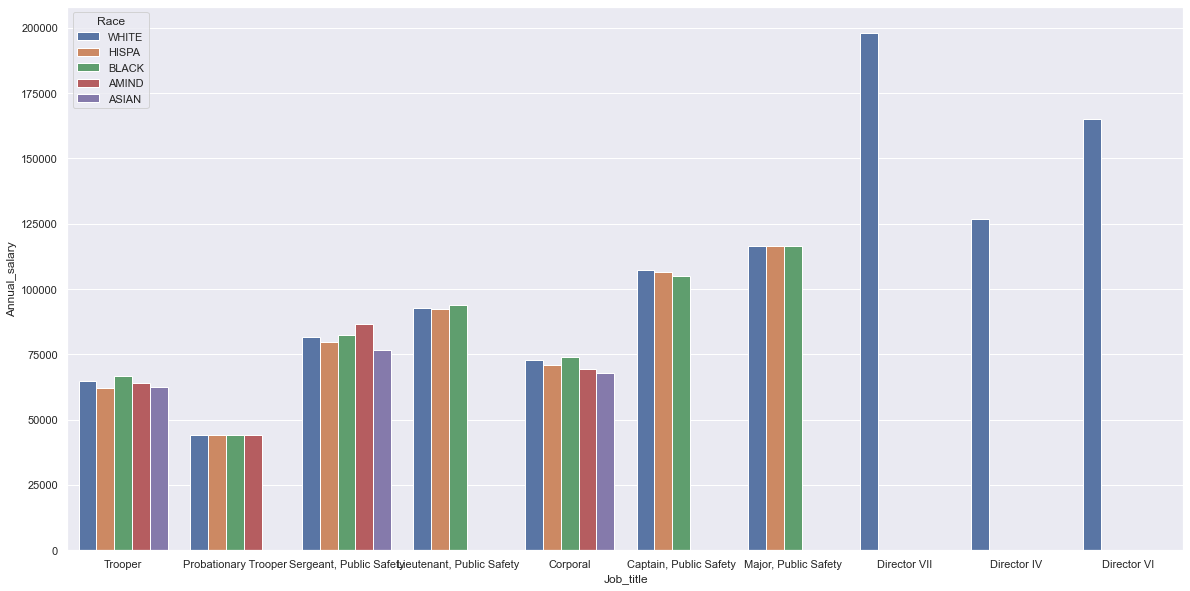

In [44]:
#Job title vs Annual salary vs Race
ax = sns.barplot(x="Job_title", y="Annual_salary", hue='Race',data=df, ci=False)

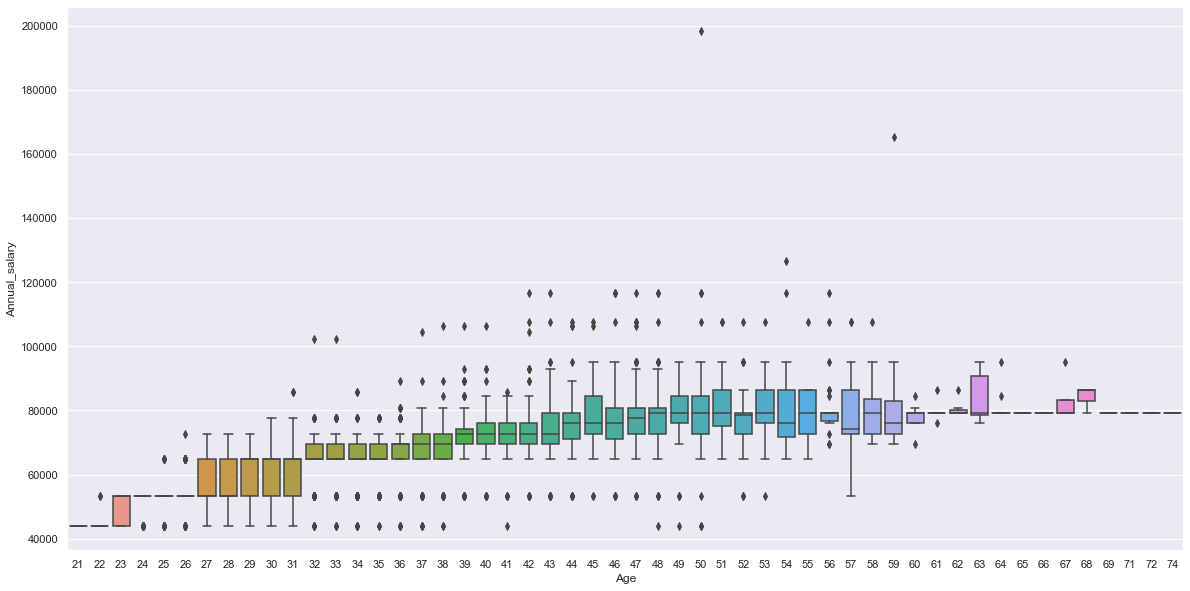

In [45]:
ax = sns.boxplot(x="Age", y="Annual_salary", data=df)

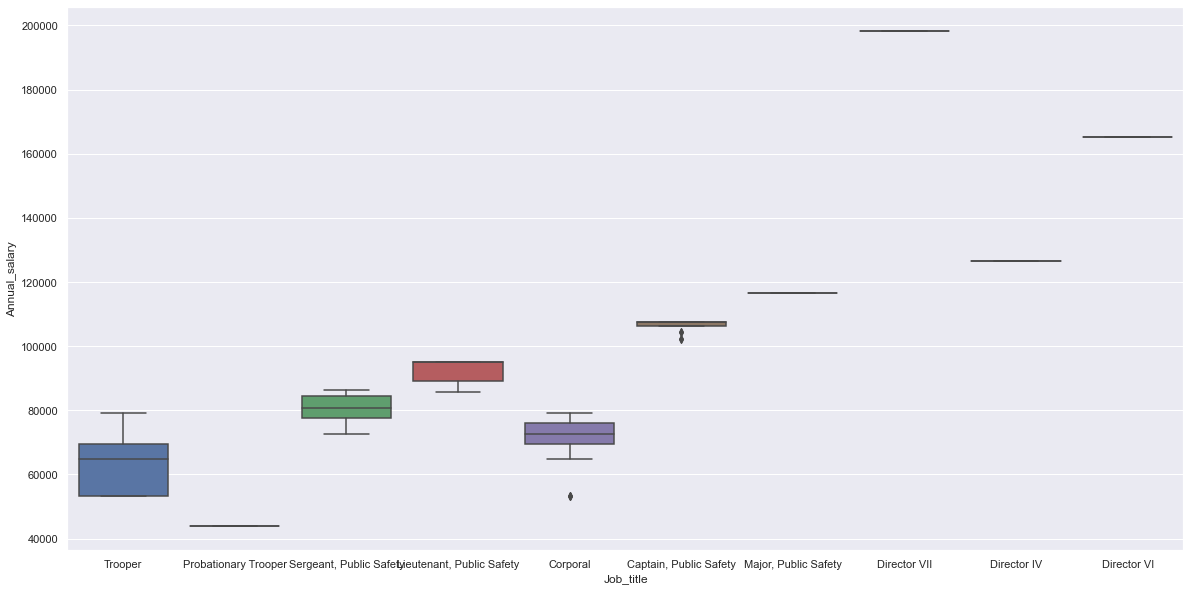

In [46]:
ax = sns.boxplot(x="Job_title", y="Annual_salary", data=df)

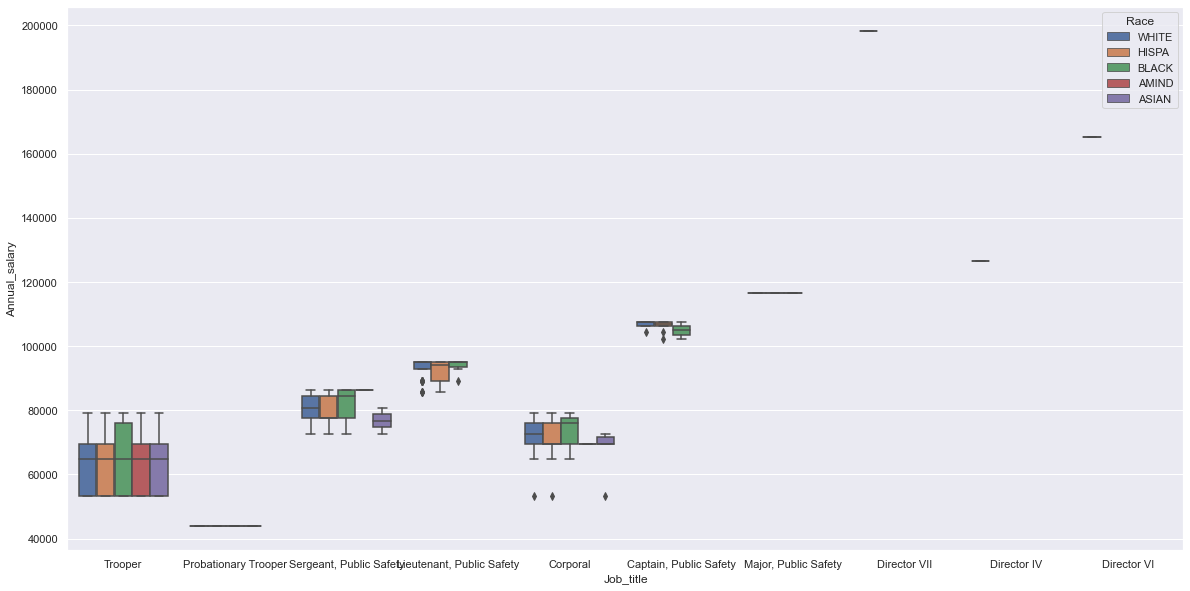

In [47]:
ax = sns.boxplot(x="Job_title", y="Annual_salary", data=df, hue='Race')

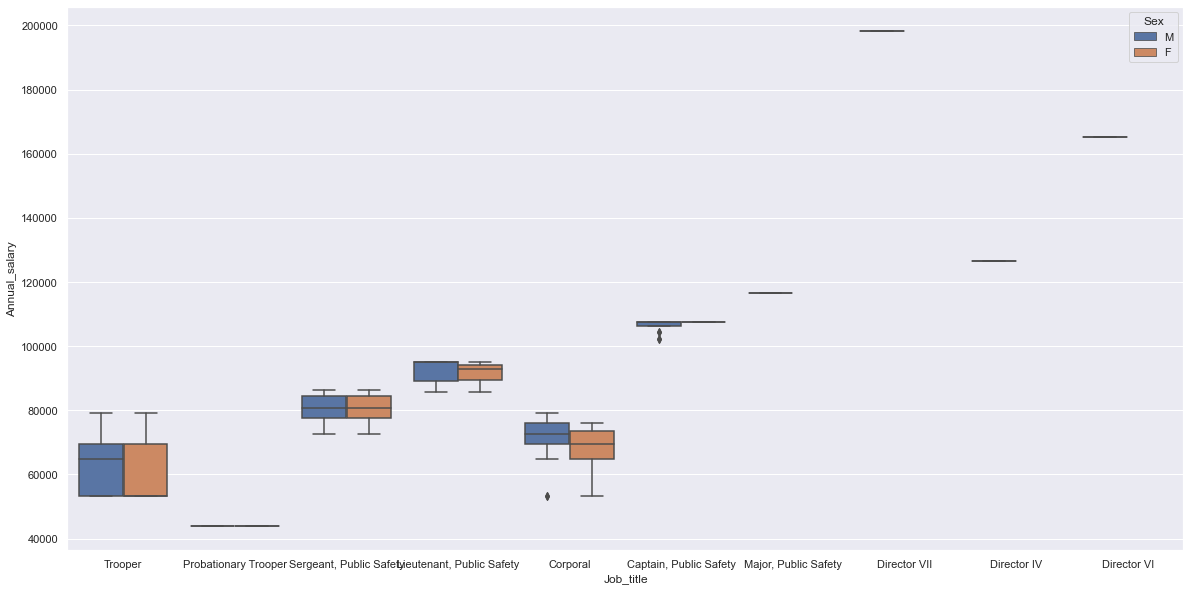

In [48]:
ax = sns.boxplot(x="Job_title", y="Annual_salary", data=df, hue='Sex')

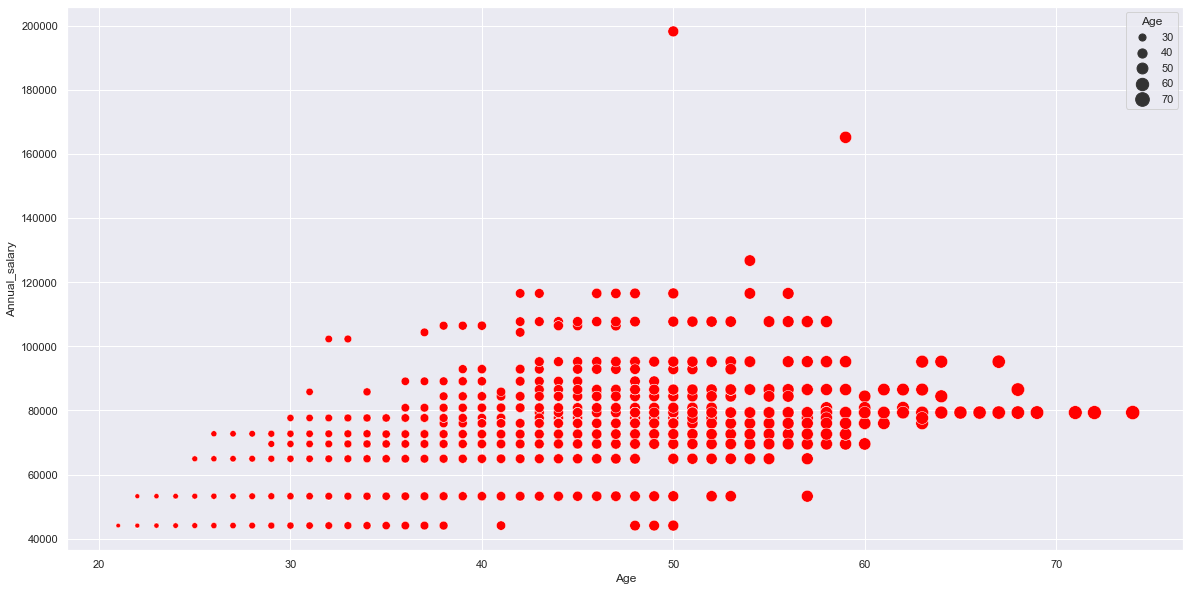

In [49]:
ax = sns.scatterplot(x="Age", y="Annual_salary", data=df, color = 'red', size = 'Age',
                    sizes=(20, 200))

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


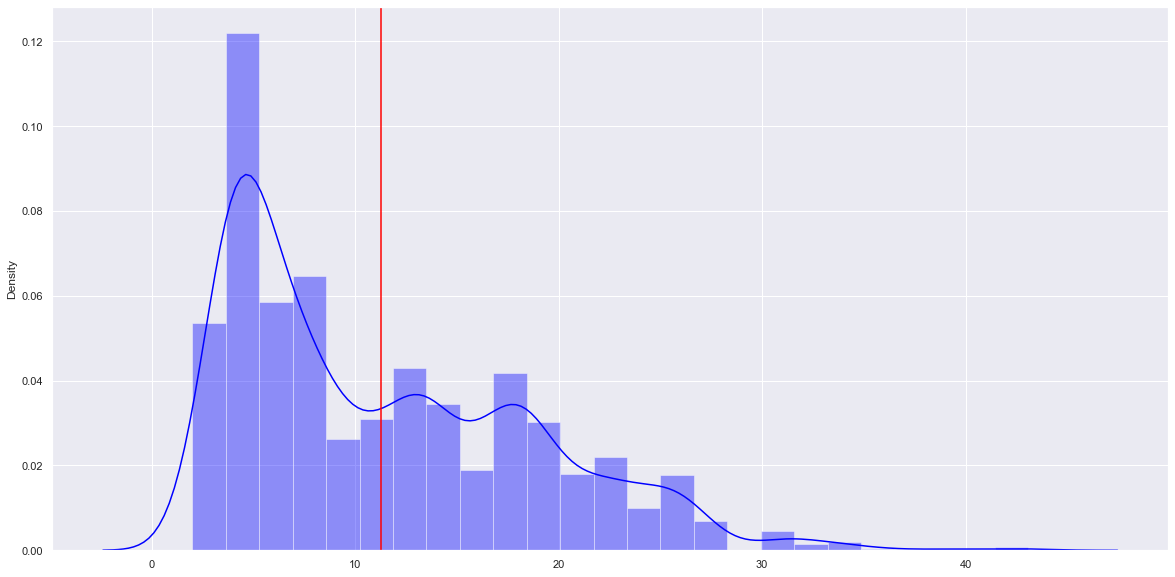

In [50]:
x = df['Experience_years'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = df['Experience_years'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


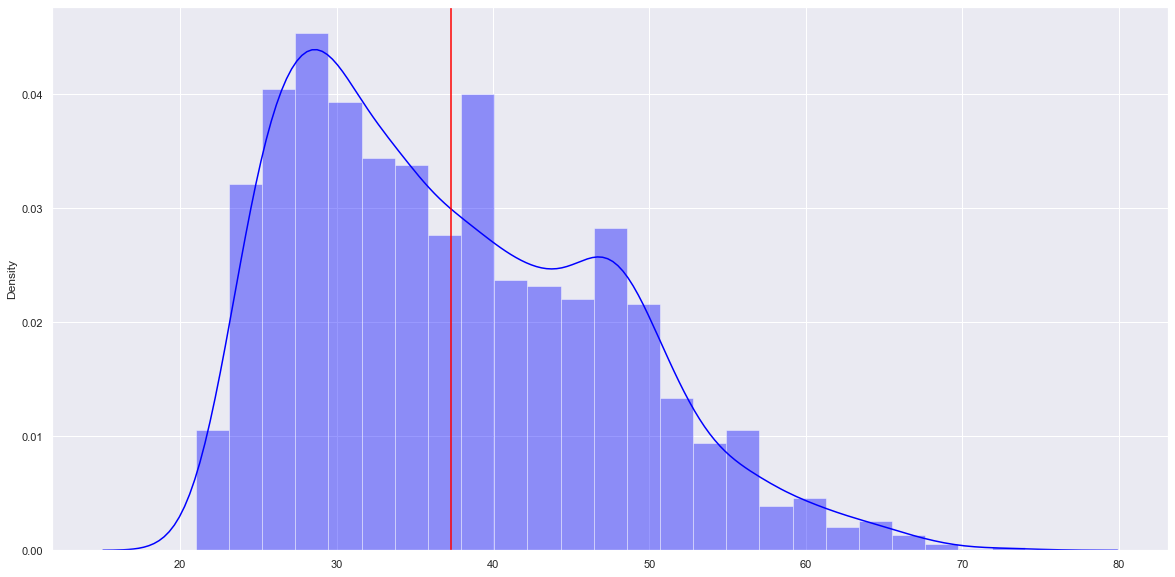

In [51]:
x = df['Age'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = df['Age'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


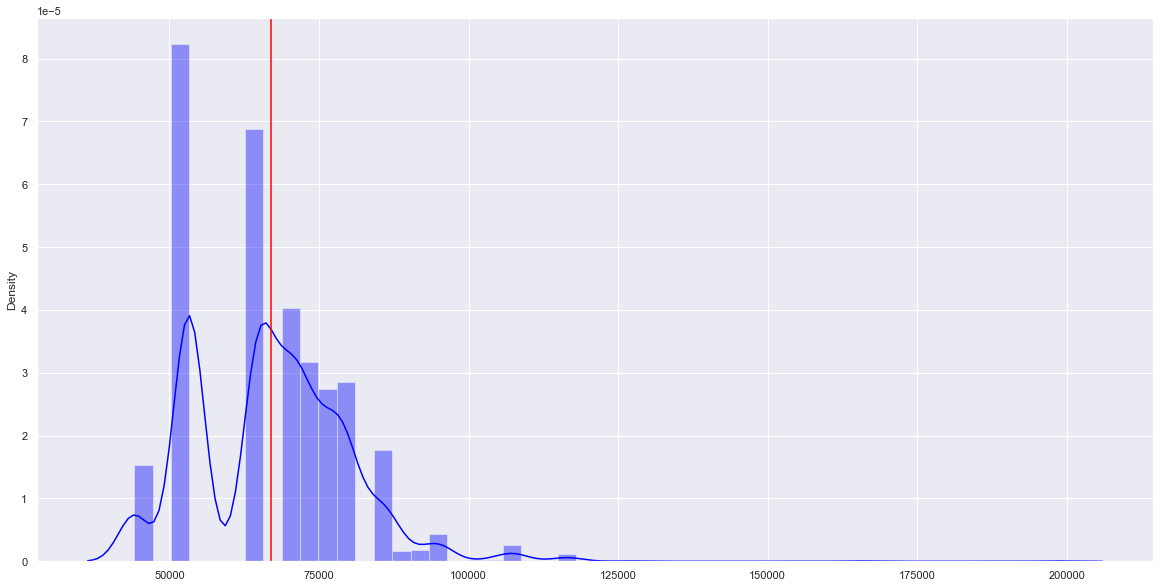

In [52]:
x = df['Annual_salary'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = df['Annual_salary'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

The meadian is:  64918.92


C:\Users\victo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


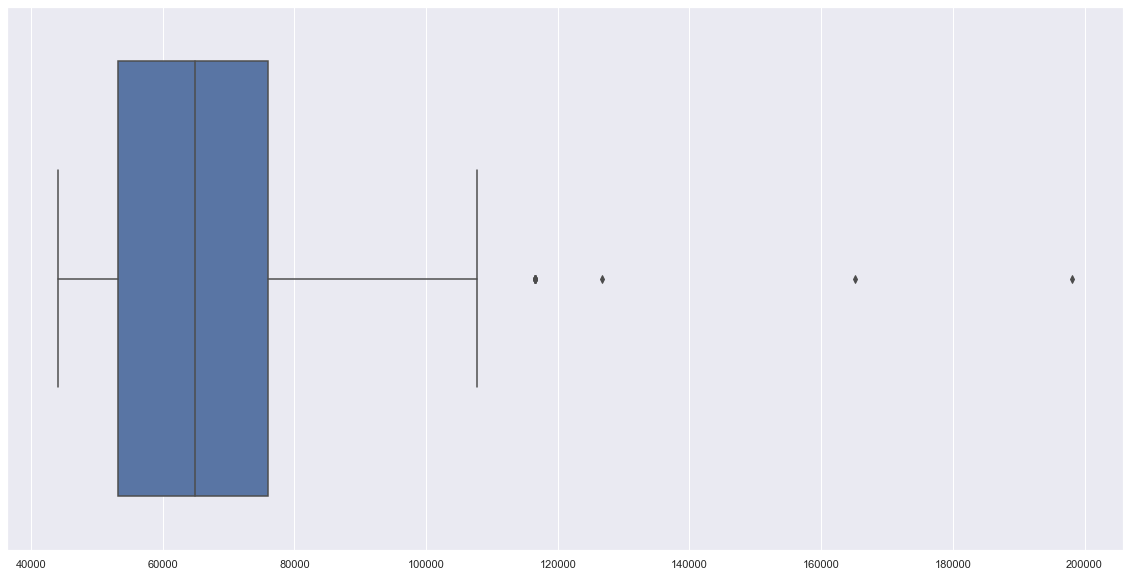

In [53]:
x = df['Annual_salary'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['Annual_salary'].median())

The meadian is:  35.0


C:\Users\victo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


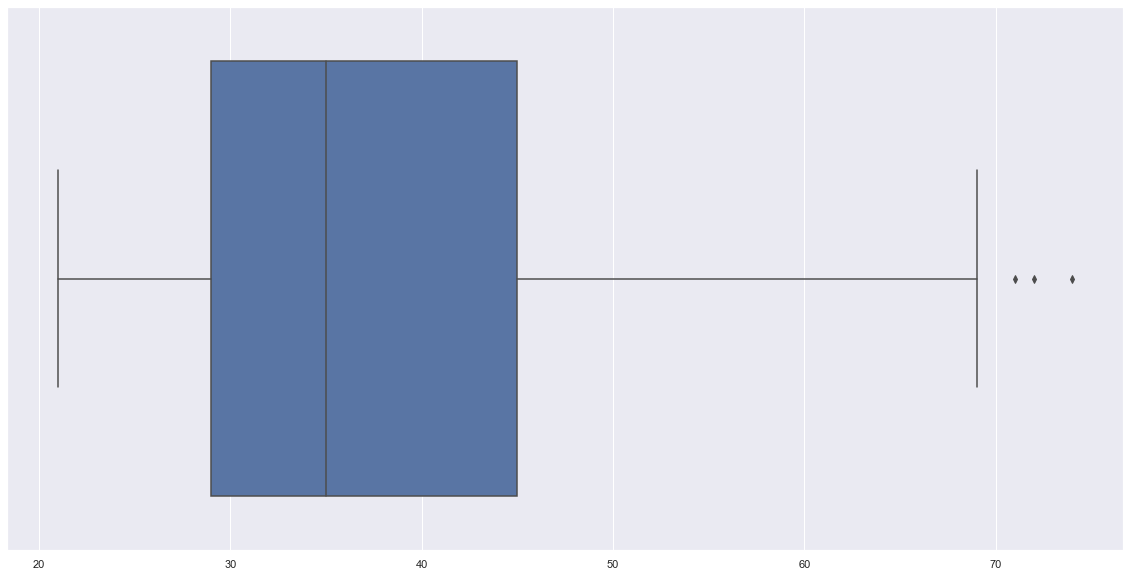

In [54]:
x = df['Age'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['Age'].median())

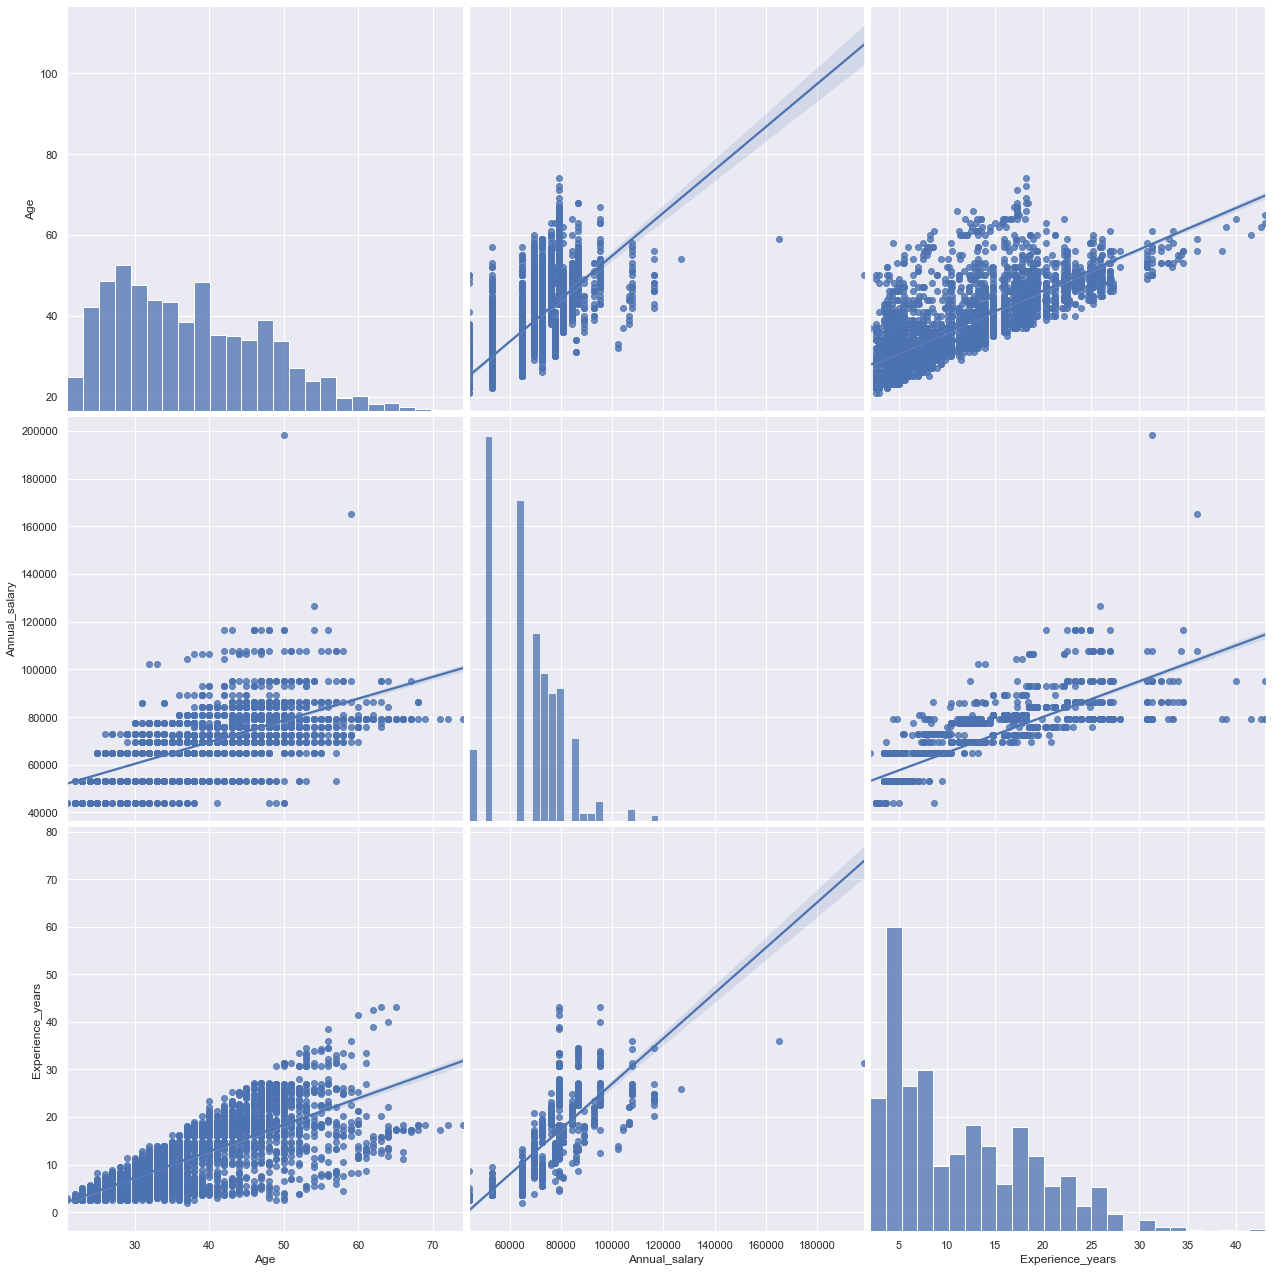

In [55]:
g = sns.pairplot(df[['Age','Annual_salary','Experience_years']], kind="reg", height = 6)

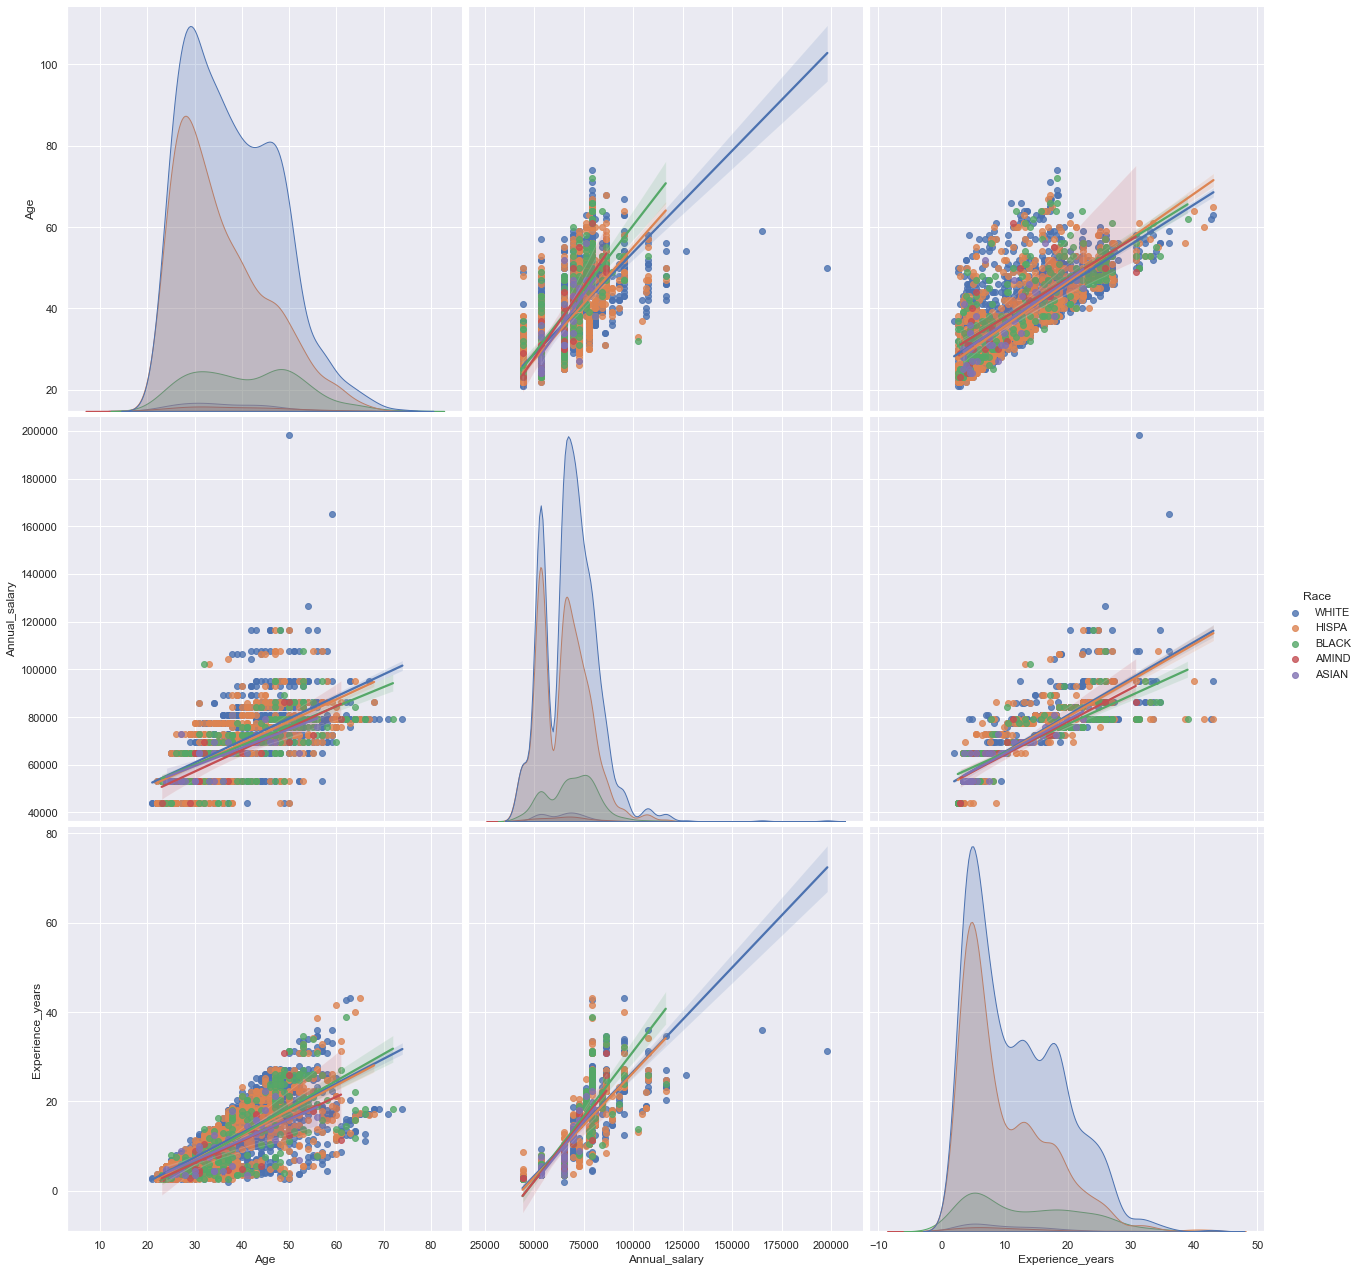

In [56]:
g = sns.pairplot(df[['Age','Annual_salary', 'Experience_years','Race']], hue = 'Race', kind="reg", height = 6)

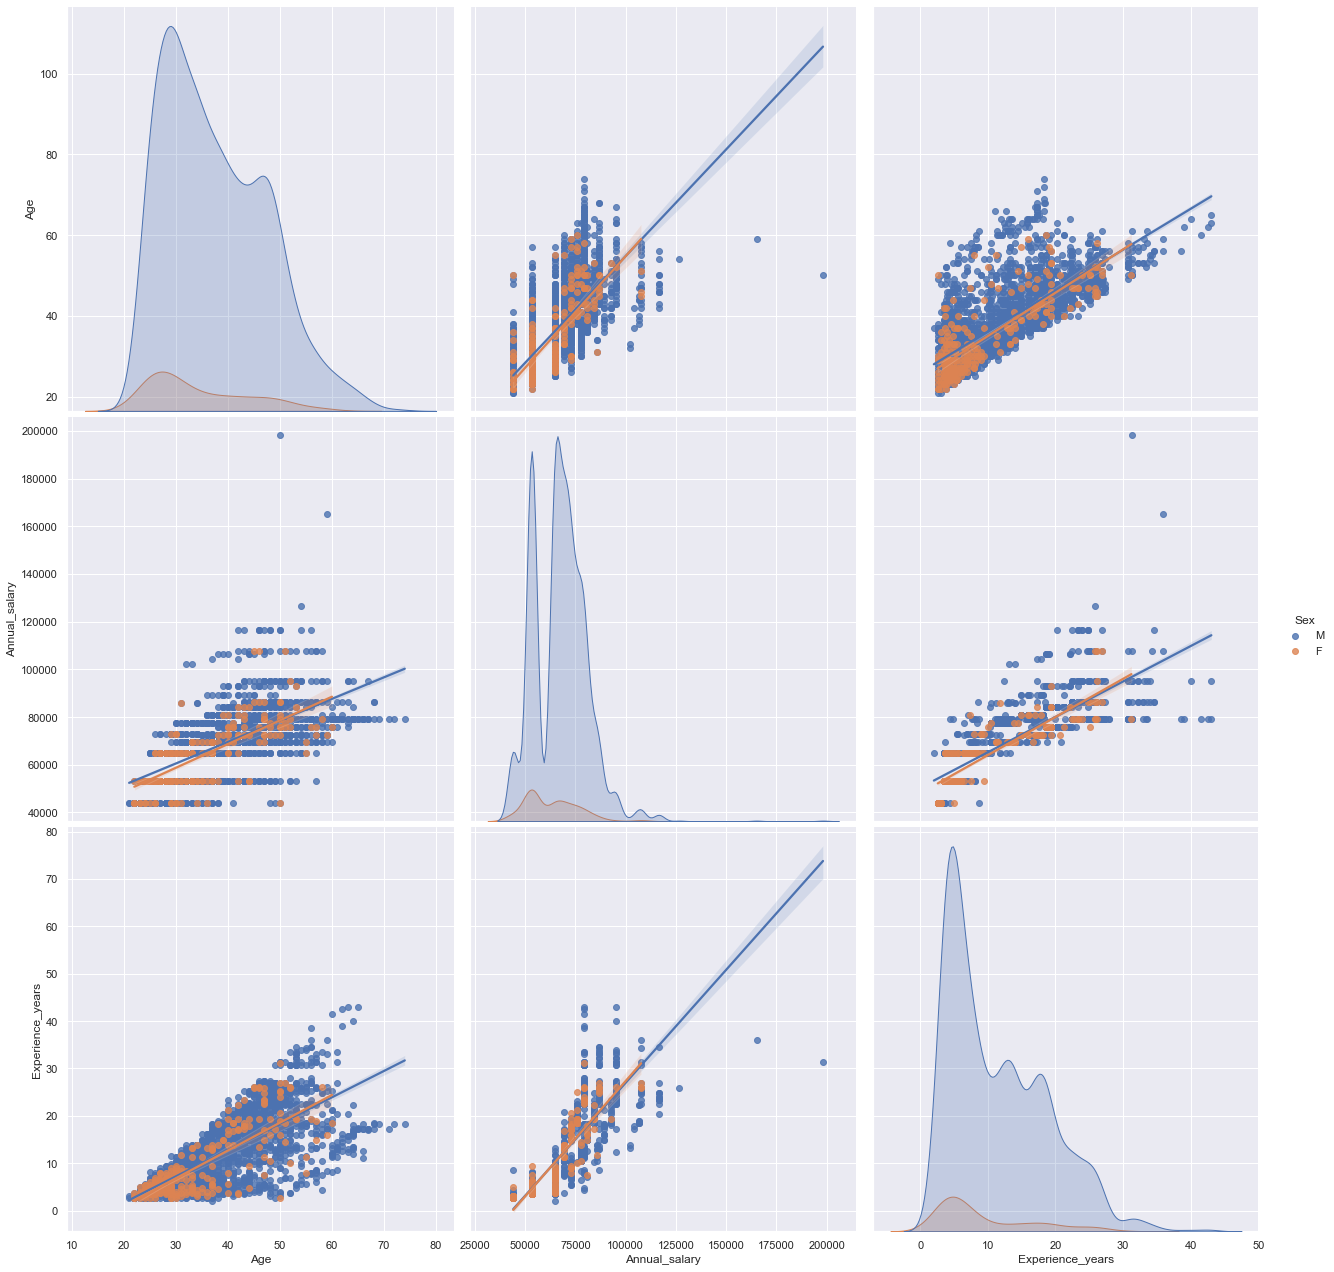

In [57]:
g = sns.pairplot(df[['Age','Annual_salary','Experience_years', 'Sex']], hue = 'Sex', kind="reg", height = 6)

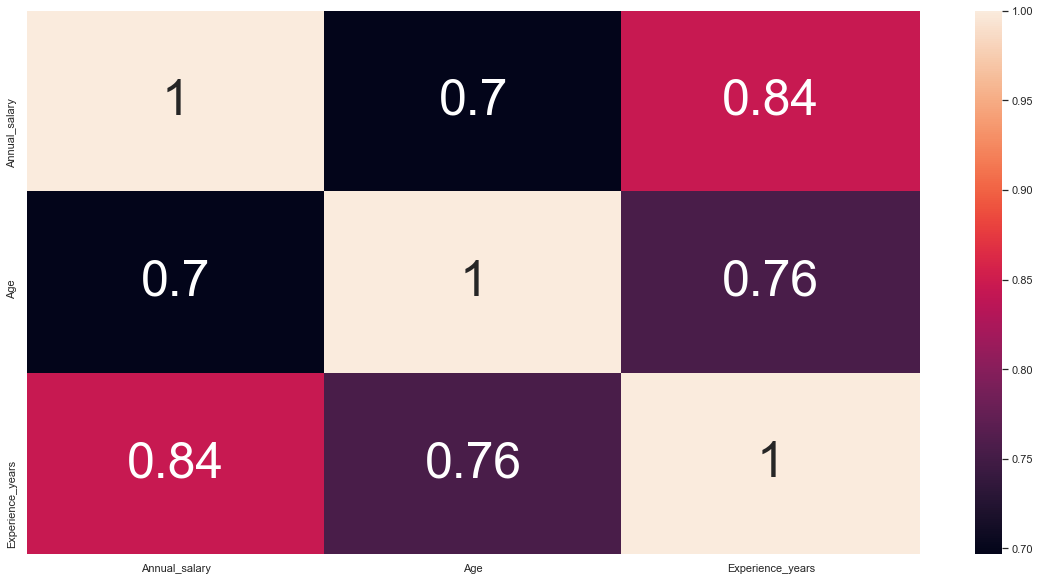

In [58]:
#Heatmap

heat = df[['Annual_salary','Age','Job_title', 'Experience_years','Race', 'Sex']].corr(method ='pearson')

cols = ['Annual_salary','Age','Experience_years']

ax = sns.heatmap(heat, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50})

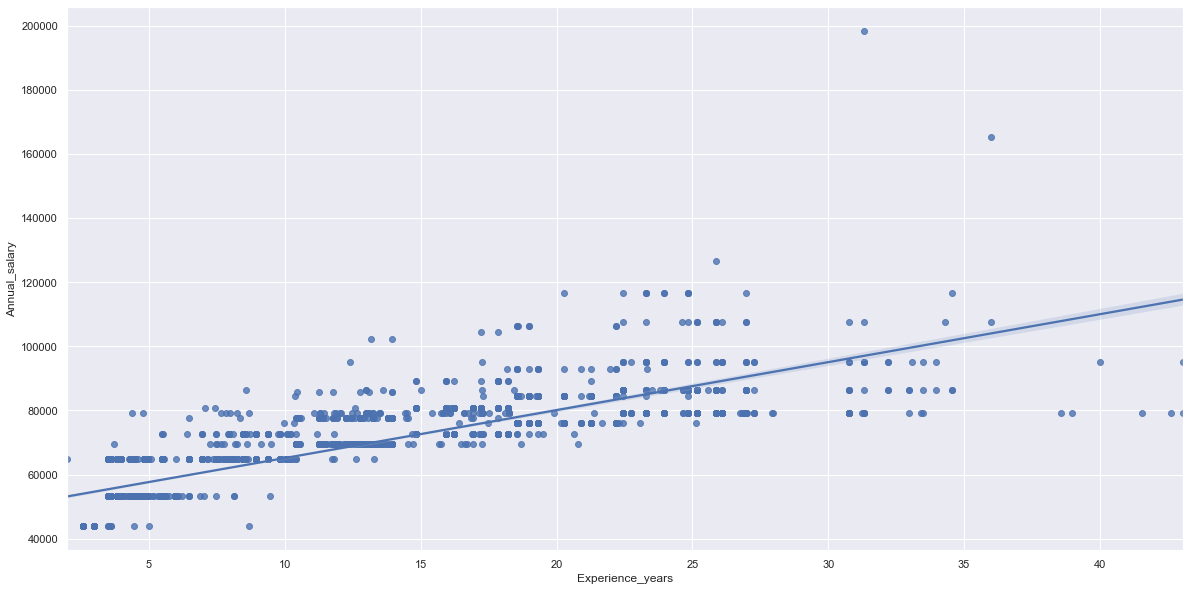

In [59]:
ax = sns.regplot(x='Experience_years', y='Annual_salary', data =df)

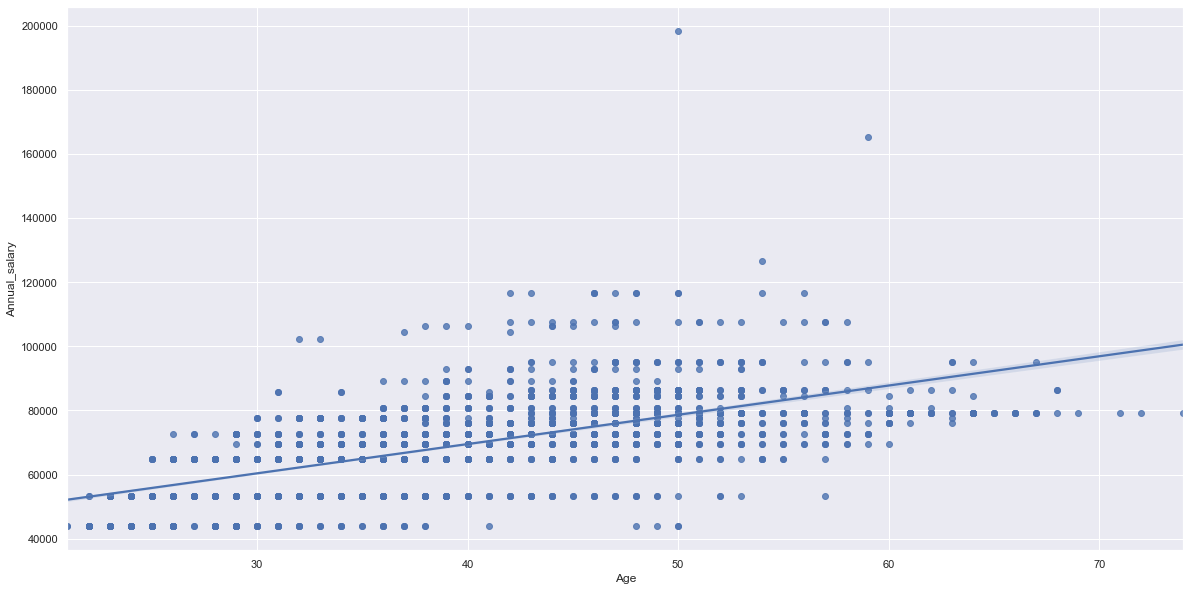

In [60]:
ax = sns.regplot(x='Age', y='Annual_salary', data =df)

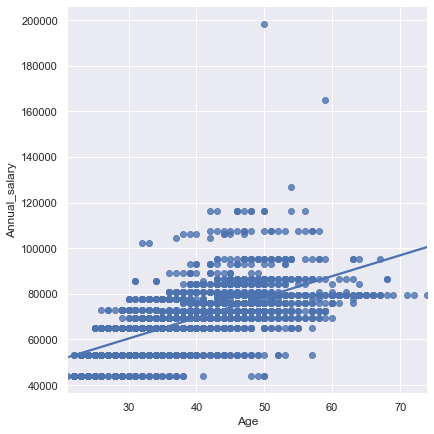

In [61]:
ax = sns.lmplot(x="Age", y="Annual_salary", data=df, ci= False, height=6)

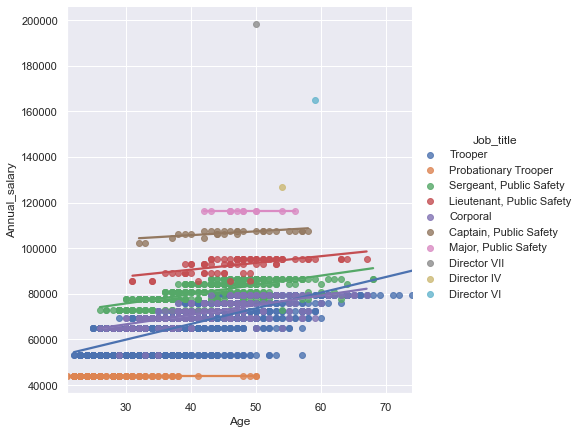

In [62]:
ax = sns.lmplot(x="Age", y="Annual_salary", data=df, hue = 'Job_title', ci= False, height=6)

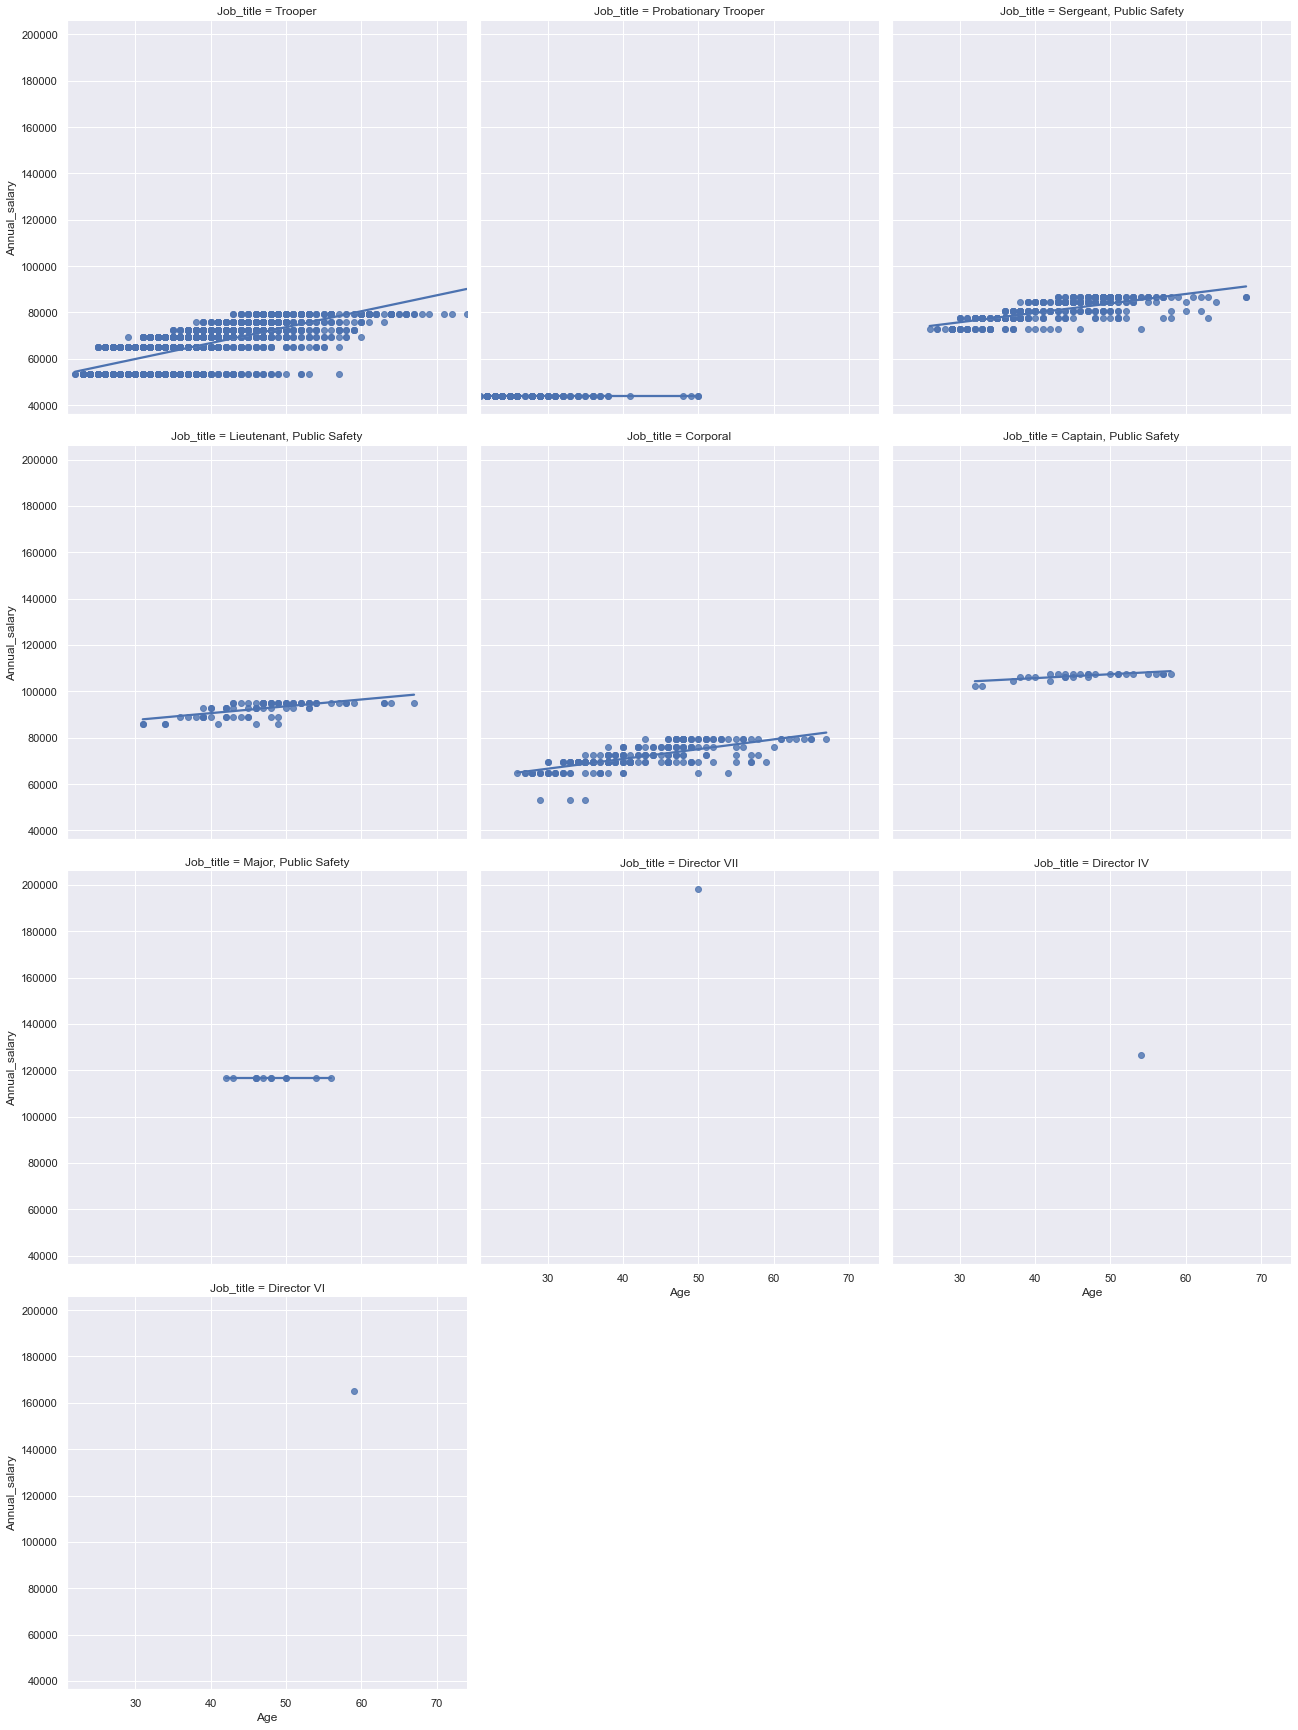

In [63]:
ax = sns.lmplot(x="Age", y="Annual_salary", data=df, col = 'Job_title', ci= False, height=6, col_wrap=3)

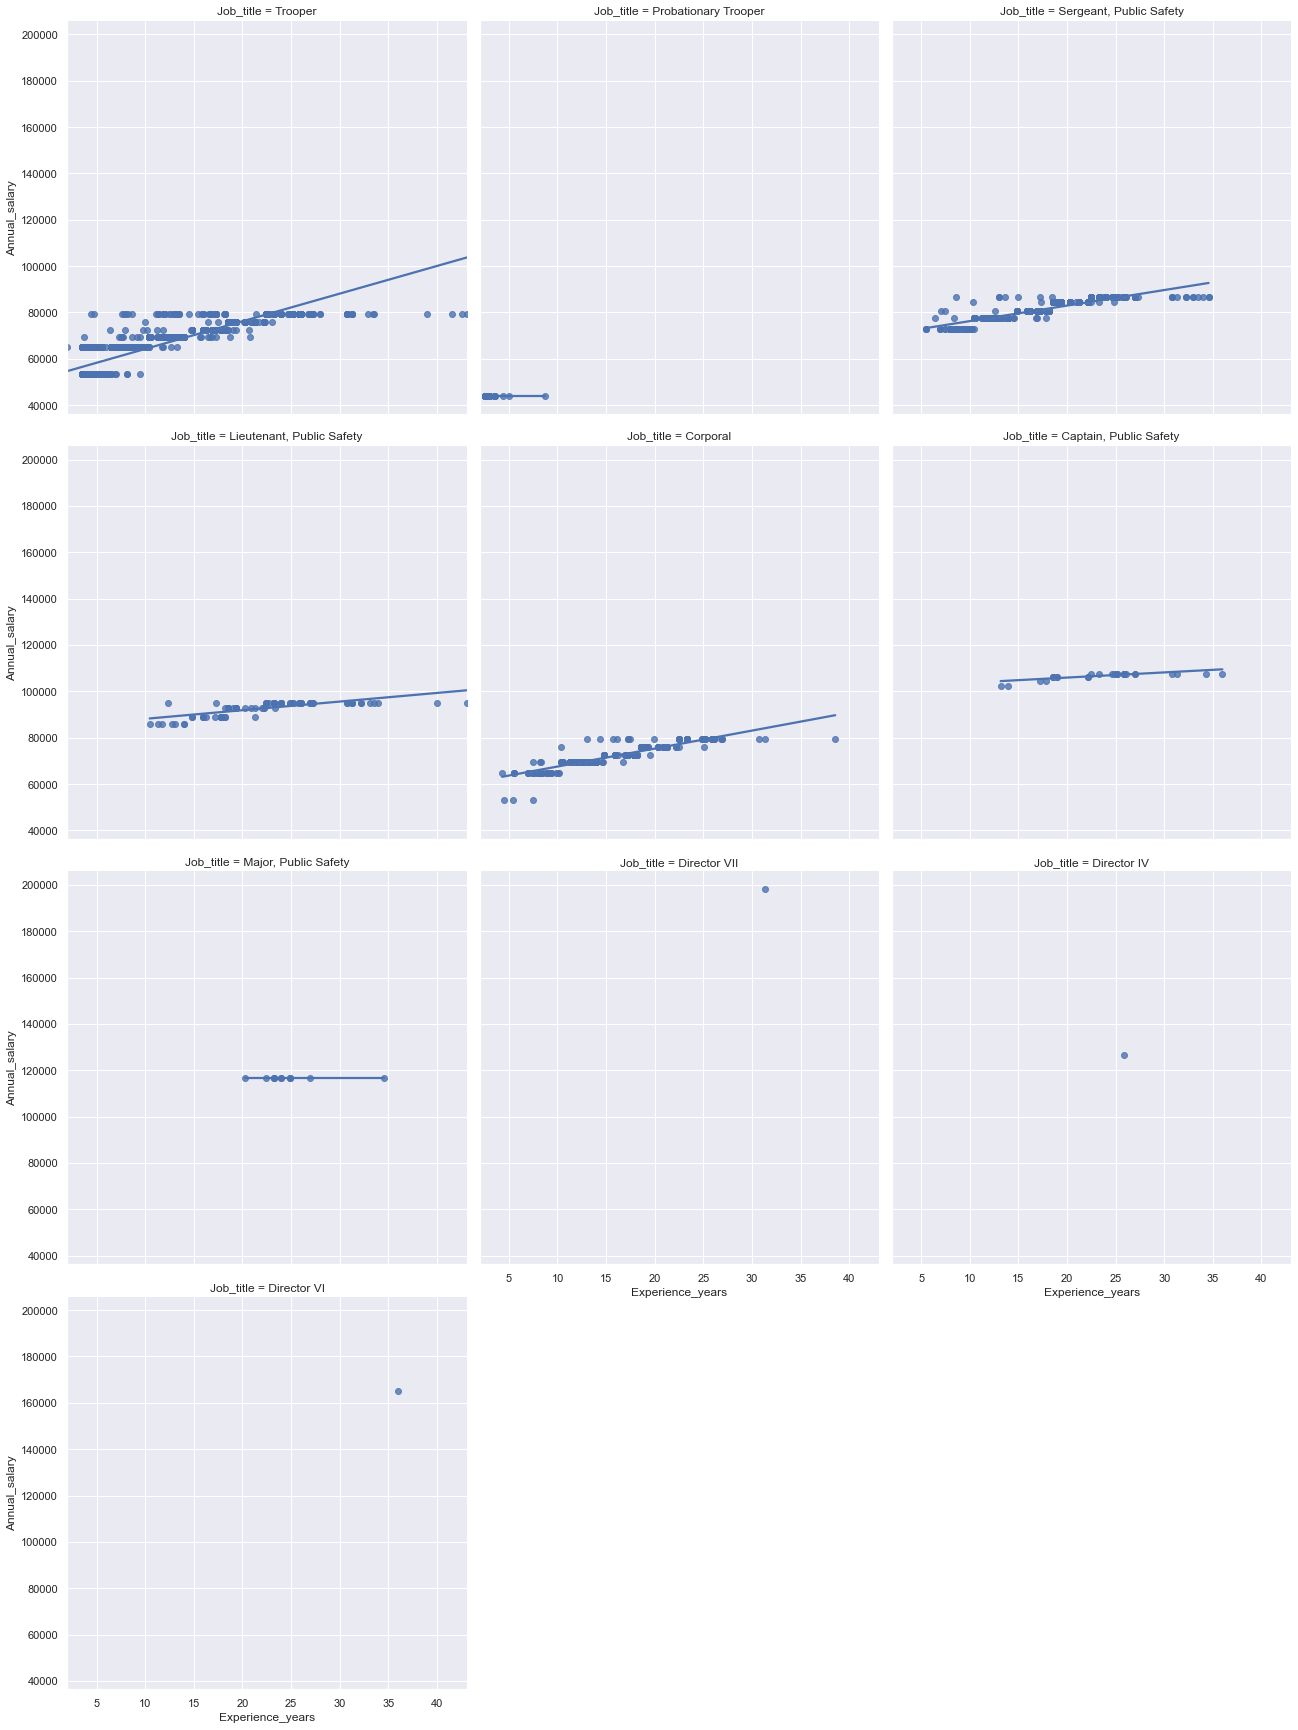

In [64]:
ax = sns.lmplot(x="Experience_years", y="Annual_salary", data=df, col = 'Job_title', ci= False, height=6, col_wrap=3)

In [65]:
df

,Employee_name,Short_desc,Job_title,Job_function,Annual_salary,Sex,Age,Race,Hire_date,Id_no,Date,Experience,Experience_years
0,"Abay,Michael Gerald",THP,Trooper,Highway Patrol Trooper,64918.92,M,31,WHITE,2013-07-14,14134,2021-01-01,2728 days,7.469010
1,"Abreu,Joe Luis",THP,Trooper,Highway Patrol Trooper,64918.92,M,27,HISPA,2015-06-21,14534,2021-01-01,2021 days,5.533310
2,"Abshire,Brian P",THP,Trooper,Highway Patrol Trooper,69540.96,M,33,WHITE,2008-08-18,13325,2021-01-01,4519 days,12.372602
3,"Abundiz,Joshua Anthony",THP,Probationary Trooper,Probationary Trooper,44082.00,M,22,HISPA,2018-01-07,15516,2021-01-01,1090 days,2.984319
4,"Aburto Jr,Jaime",THP,"Sergeant, Public Safety",Highway Patrol Sergeant,72711.00,M,54,HISPA,2011-08-17,13757,2021-01-01,3425 days,9.377331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,"Zobel,Matthew Brandon",THP,Trooper,Highway Patrol Trooper,69540.96,M,34,WHITE,2009-09-27,13420,2021-01-01,4114 days,11.263749
3163,"Zuniga,Juan Hector",THP,Trooper,Highway Patrol Trooper,64918.92,M,37,HISPA,2013-01-21,14132,2021-01-01,2902 days,7.945406
3164,"Zuniga,Leandro",THP,Corporal,Highway Patrol Corporal,64918.92,M,33,HISPA,2013-01-21,14124,2021-01-01,2902 days,7.945406
3165,"Zuniga,Maria Guadalupe",THP,Trooper,Highway Patrol Trooper,53241.96,F,23,HISPA,2017-03-12,15417,2021-01-01,1391 days,3.808429


###Machine Learning

In [66]:
#selecting my variables for machine learning
df1=df[['Job_title','Annual_salary','Age','Sex','Race','Experience_years']]

In [67]:
df1

,Job_title,Annual_salary,Age,Sex,Race,Experience_years
0,Trooper,64918.92,31,M,WHITE,7.469010
1,Trooper,64918.92,27,M,HISPA,5.533310
2,Trooper,69540.96,33,M,WHITE,12.372602
3,Probationary Trooper,44082.00,22,M,HISPA,2.984319
4,"Sergeant, Public Safety",72711.00,54,M,HISPA,9.377331
...,...,...,...,...,...,...
3162,Trooper,69540.96,34,M,WHITE,11.263749
3163,Trooper,64918.92,37,M,HISPA,7.945406
3164,Corporal,64918.92,33,M,HISPA,7.945406
3165,Trooper,53241.96,23,F,HISPA,3.808429


In [68]:
#encoding my categories

df2 = pd.get_dummies(df1, columns = ['Sex', 'Race','Job_title'])

In [69]:
df2

,Annual_salary,Age,Experience_years,Sex_F,Sex_M,Race_AMIND,Race_ASIAN,Race_BLACK,Race_HISPA,Race_WHITE,"Job_title_Captain, Public Safety",Job_title_Corporal,Job_title_Director IV,Job_title_Director VI,Job_title_Director VII,"Job_title_Lieutenant, Public Safety","Job_title_Major, Public Safety",Job_title_Probationary Trooper,"Job_title_Sergeant, Public Safety",Job_title_Trooper
0,64918.92,31,7.469010,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,64918.92,27,5.533310,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,69540.96,33,12.372602,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,44082.00,22,2.984319,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,72711.00,54,9.377331,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,69540.96,34,11.263749,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3163,64918.92,37,7.945406,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3164,64918.92,33,7.945406,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3165,53241.96,23,3.808429,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [70]:
# Split the data into X & y

X = df2.drop('Annual_salary', axis = 1).values
X2 = df2.drop('Annual_salary', axis = 1)
y = df2['Annual_salary']

print(X.shape)
print(y.shape)

X

(3167, 19)
(3167,)


array([[31.        ,  7.46901032,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [27.        ,  5.53331006,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [33.        , 12.37260176,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [33.        ,  7.94540613,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [23.        ,  3.80842865,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [66.        , 17.25428996,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [71]:
#Split the data into trainset and testset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2533, 19)
(634, 19)
(2533,)
(634,)


In [72]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [73]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy on  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.9041988716692643
The Accuracy on  on the training dataset is:  0.9041988716692643

The Accuracy  on the testing dataset is:  0.90648055870872

The RMSE  on the training dataset is:  4014.2721605997863
The RMSE  on the testing dataset is:  3987.7017611854844

The MAE  on the training dataset is:  3279.8173713088386
The MAE  on the testing dataset is:  3341.6076446943653

Coefficients:  [ 2.18627547e+02  8.34579462e+02 -4.03643826e+02  4.03643826e+02
 -4.31417357e+02 -2.21446402e+02 -1.72241332e+02  2.75497728e+02
  5.49607364e+02 -8.99399430e+02 -2.83023612e+04 -3.63797881e-11
  4.42411297e+04  8.31366343e+04 -1.43274599e+04  8.48712060e+03
 -4.21111026e+04 -2.04293256e+04 -2.97952359e+04]

Intercept:  77016.07621347441


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

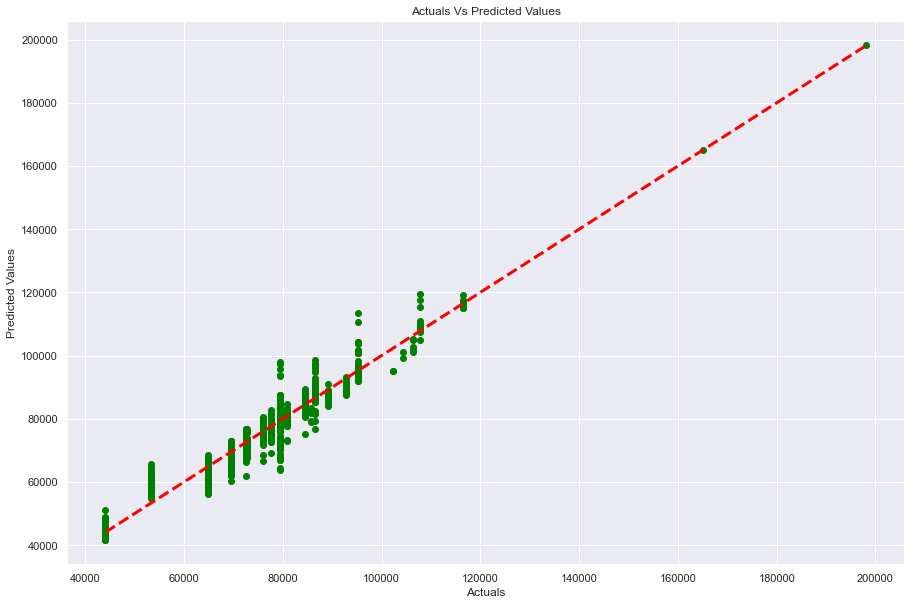

In [74]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

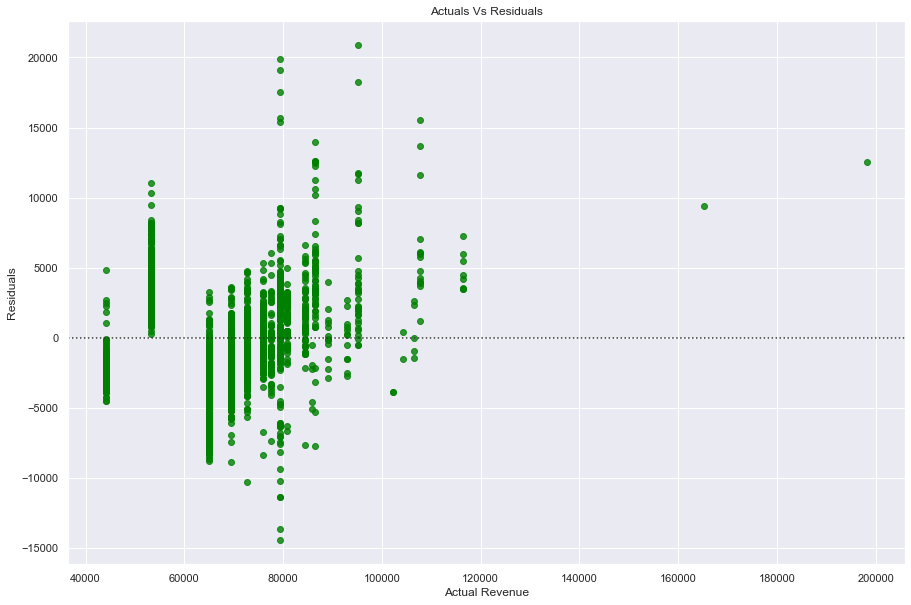

In [75]:
# Ploting Residuals - to see how much off the predicted values are!

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

In [76]:
X2.columns

Index(['Age', 'Experience_years', 'Sex_F', 'Sex_M', 'Race_AMIND', 'Race_ASIAN',
       'Race_BLACK', 'Race_HISPA', 'Race_WHITE',
       'Job_title_Captain, Public Safety', 'Job_title_Corporal',
       'Job_title_Director IV', 'Job_title_Director VI',
       'Job_title_Director VII', 'Job_title_Lieutenant, Public Safety',
       'Job_title_Major, Public Safety', 'Job_title_Probationary Trooper',
       'Job_title_Sergeant, Public Safety', 'Job_title_Trooper'],
      dtype='object')

In [77]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,19)


# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df

,Age,Experience_years,Sex_F,Sex_M,Race_AMIND,Race_ASIAN,Race_BLACK,Race_HISPA,Race_WHITE,"Job_title_Captain, Public Safety",Job_title_Corporal,Job_title_Director IV,Job_title_Director VI,Job_title_Director VII,"Job_title_Lieutenant, Public Safety","Job_title_Major, Public Safety",Job_title_Probationary Trooper,"Job_title_Sergeant, Public Safety",Job_title_Trooper
0,218.627547,834.579462,-403.643826,403.643826,-431.417357,-221.446402,-172.241332,275.497728,549.607364,-899.39943,-28302.361244,-3.637979e-11,44241.129723,83136.634284,-14327.459874,8487.1206,-42111.102596,-20429.325587,-29795.235875


In [78]:
# Making Predictions                        

# Variables

Sex = 'Sex_F'
Age = 50
Race = 'Race_WHITE'
Job_title = 'Job_title_Director IV'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = Age and x = coefficient of age

# Prediction Calculator
pred1 = (lm.intercept_) + (Coeff_df[Sex].values[0] * 1) + (Coeff_df['Age'].values[0] * Age) + (Coeff_df[Race].values[0] * 1) + (Coeff_df[Job_title].values[0] * 1)

print('The predicted Revenue is: ', pred1)

The predicted Revenue is:  [88093.41712272]


In [79]:
df1.to_csv('C:\\Users\\victo\\OneDrive\\Documents\\Python Scripts\\police_hr1.csv')

In [80]:
df2.to_csv('C:\\Users\\victo\\OneDrive\\Documents\\Python Scripts\\police_hr2.csv')

In [81]:
df1.columns

Index(['Job_title', 'Annual_salary', 'Age', 'Sex', 'Race', 'Experience_years'], dtype='object')